In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
samples/opensora/A vibrant underwater scene. A group of b_spatial_mlp_mse.pt
samples/opensora/A vibrant underwater scene. A group of b_temporal_mlp_mse.pt

SyntaxError: invalid syntax (634211810.py, line 1)

In [7]:
import torch


spatial_mlp_mse = torch.load('samples/opensora/sample_pab/Time Lapse of the rising sun over a tree_spatial_mlp_mse.pt')
temporal_mlp_mse = torch.load('samples/opensora/sample_pab/Time Lapse of the rising sun over a tree_temporal_mlp_mse.pt')

print(spatial_mlp_mse)
print(temporal_mlp_mse)

{992: [(0, 0.0008869473240338266), (1, 0.0018037272384390235), (2, 0.011791707016527653), (3, 0.020173948258161545), (4, 0.024381738156080246), (5, 0.04532146081328392), (6, 0.040749240666627884), (7, 0.0726034939289093), (8, 0.08015268296003342), (9, 0.18974651396274567), (10, 0.2893409729003906), (11, 0.27650874853134155), (12, 0.3018394112586975), (13, 0.2585645616054535), (14, 0.4714759588241577), (15, 0.41939103603363037), (16, 0.9290278553962708), (17, 0.44374793767929077), (18, 0.339062362909317), (19, 0.4151577651500702), (20, 0.6900776028633118), (21, 0.5463703274726868), (22, 0.5033988952636719), (23, 1.078507423400879), (24, 6.354318618774414), (25, 4.753124713897705), (26, 4.862180709838867), (27, 0.4853242337703705)], 984: [(0, 0.00037512299604713917), (1, 0.0013281104620546103), (2, 0.006474673748016357), (3, 0.007864946499466896), (4, 0.008403331972658634), (5, 0.013234902173280716), (6, 0.016041645780205727), (7, 0.02616034634411335), (8, 0.03918959200382233), (9, 0.086

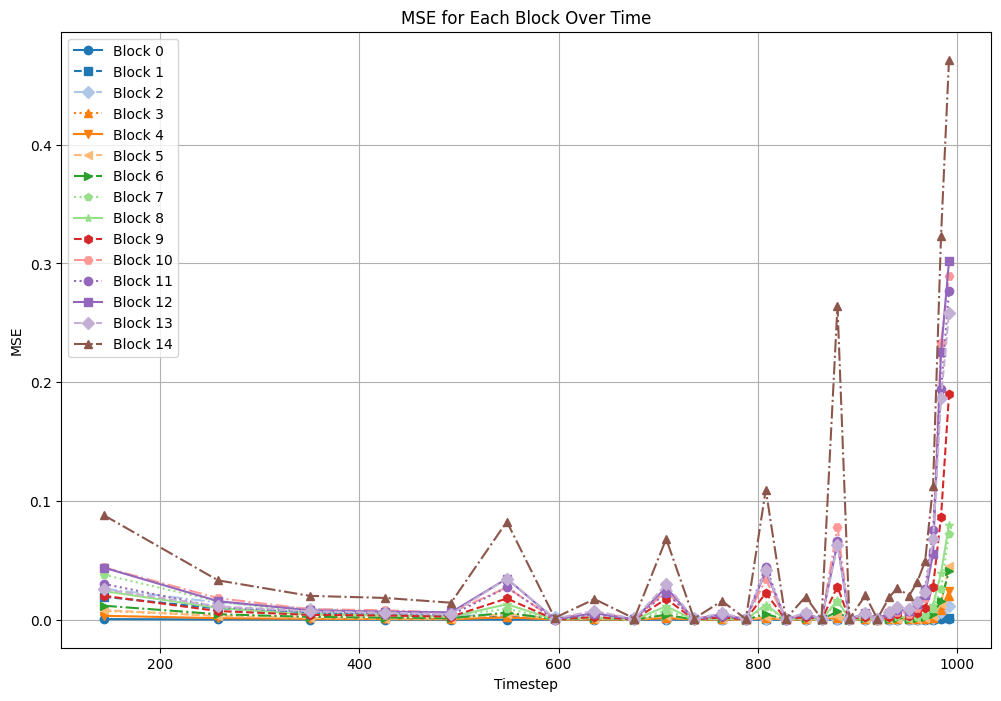

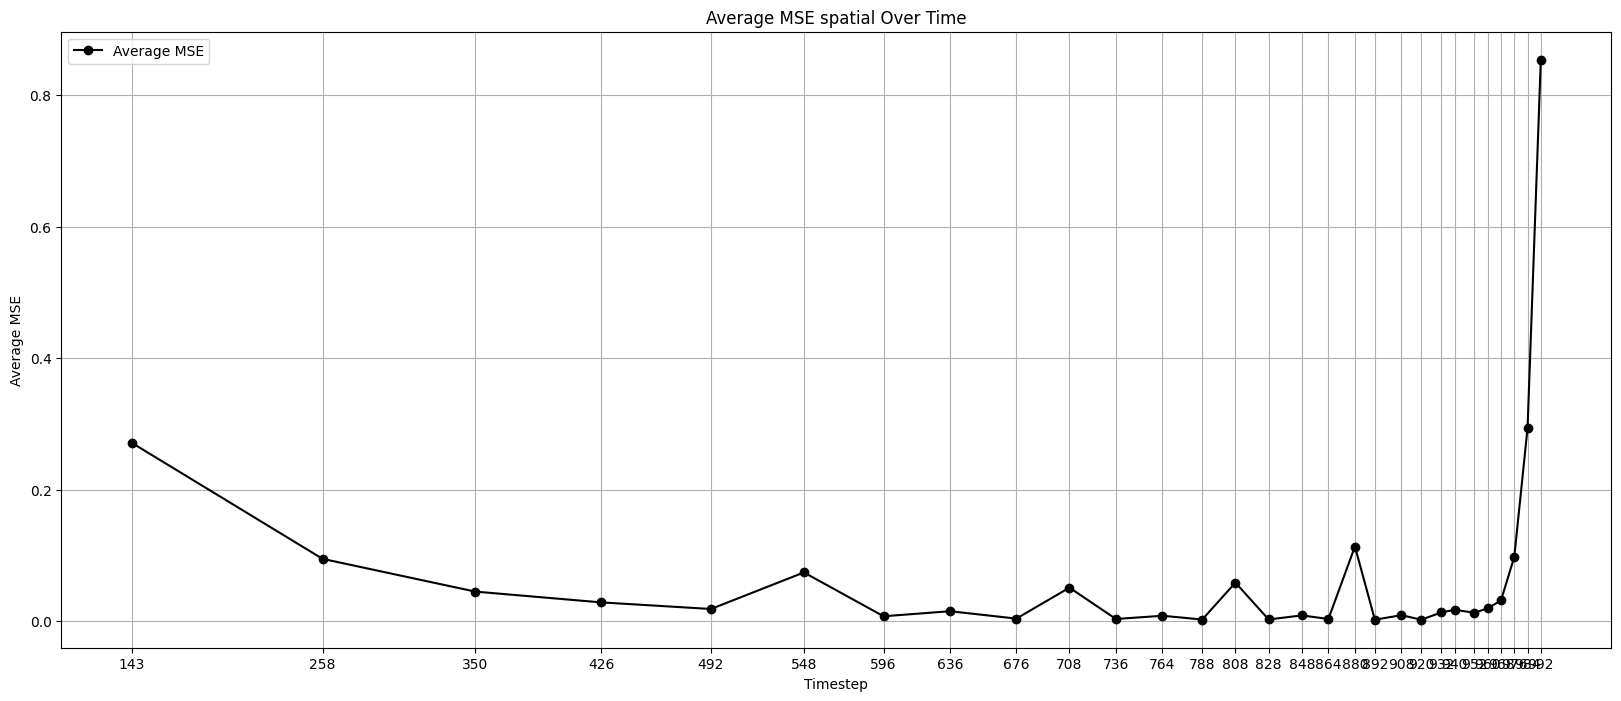

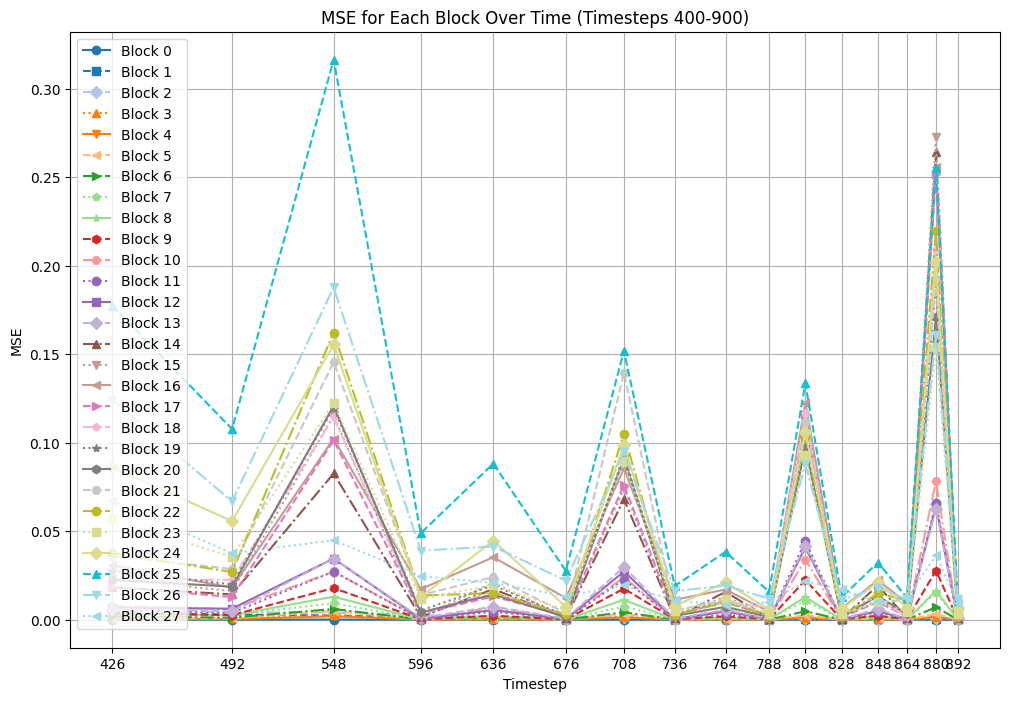

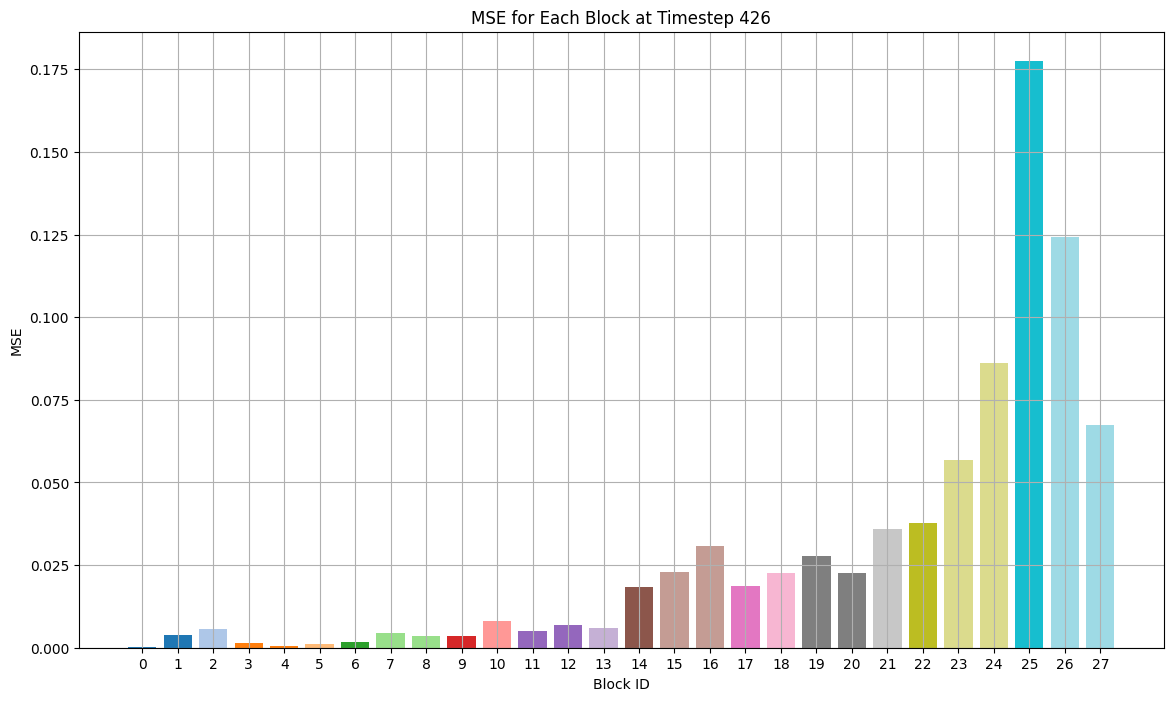

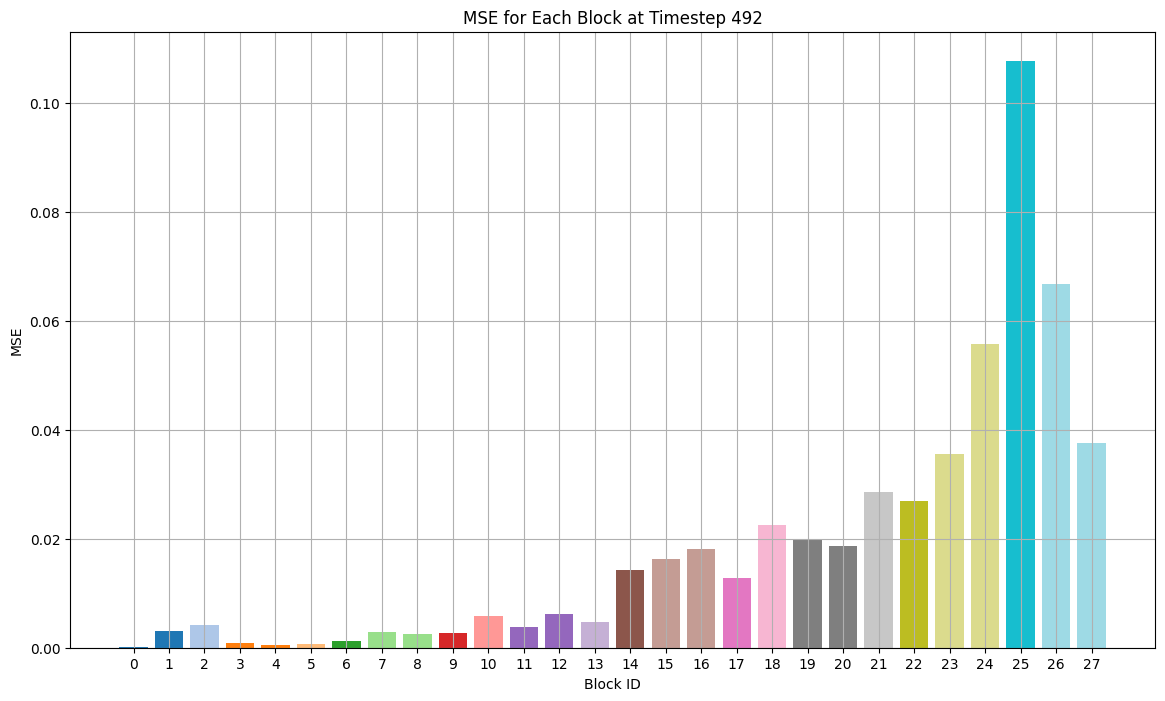

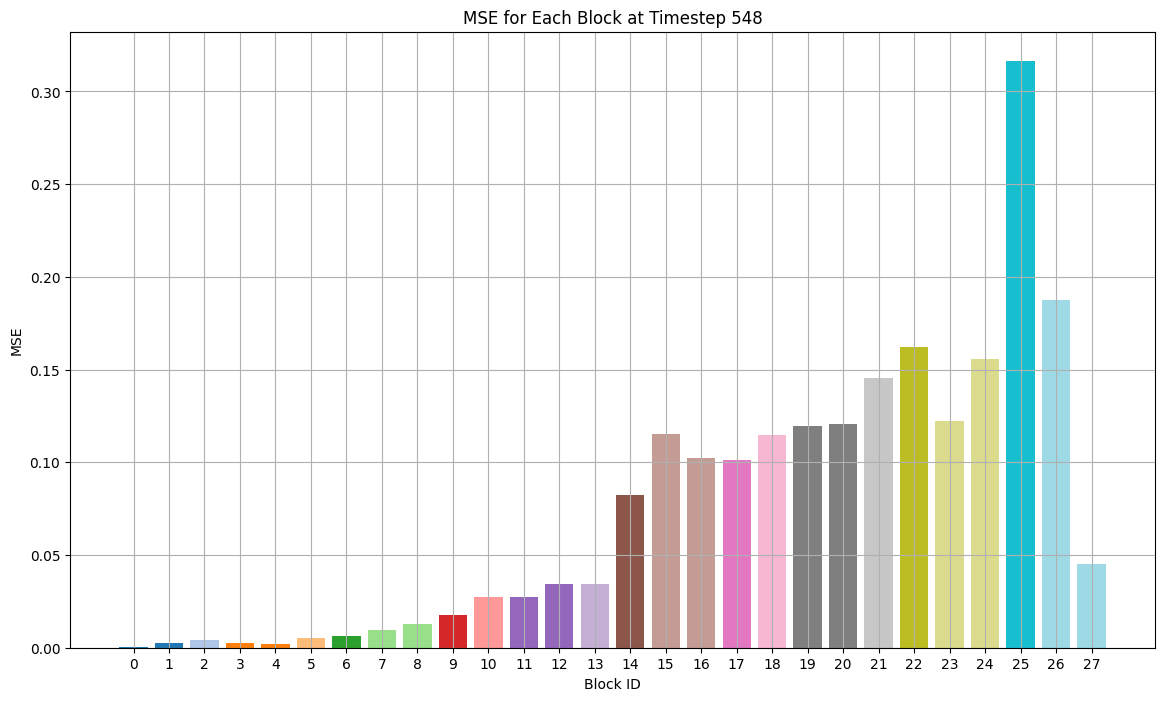

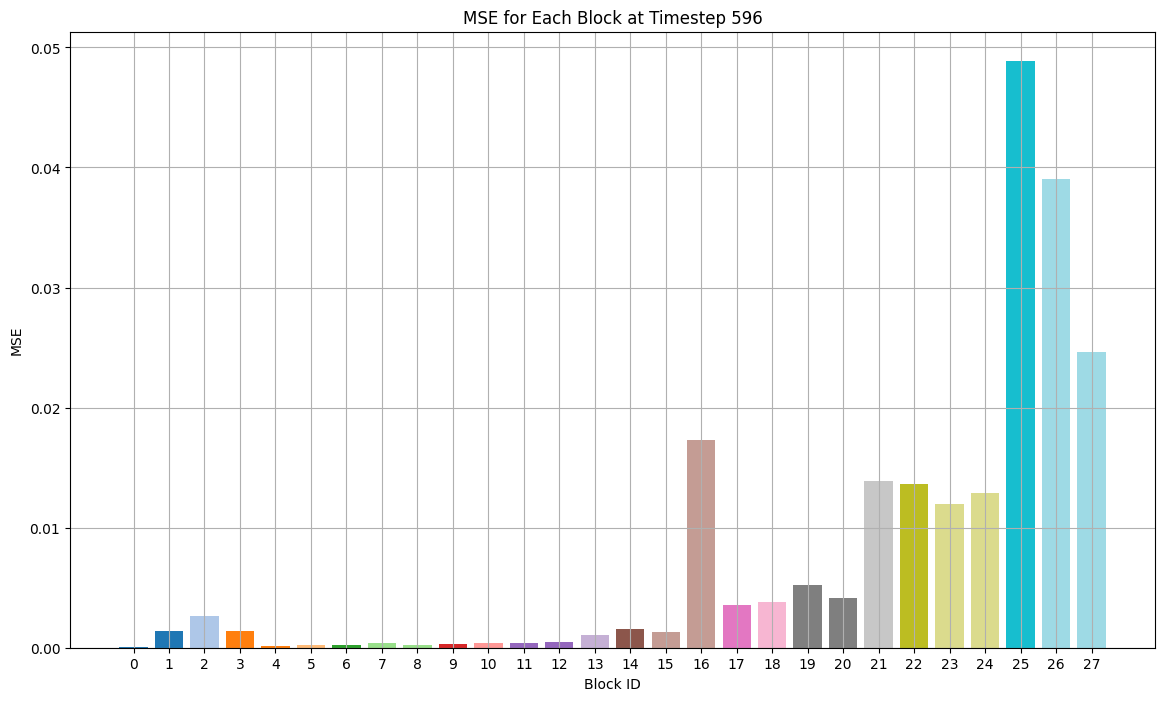

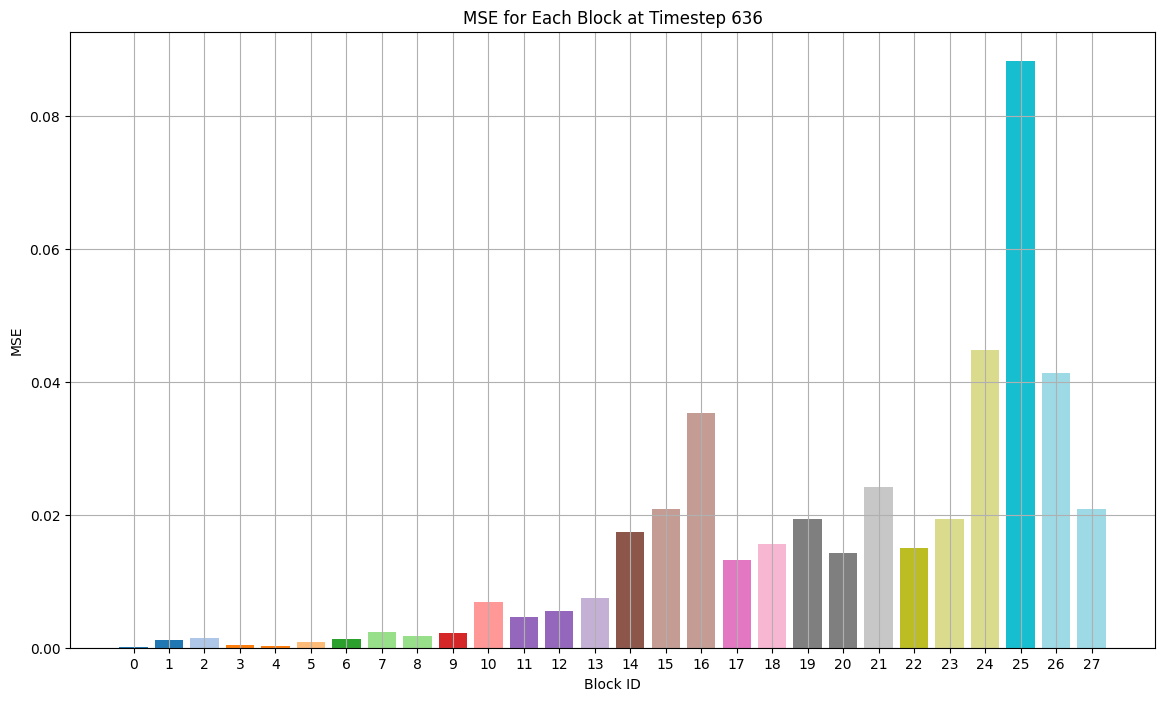

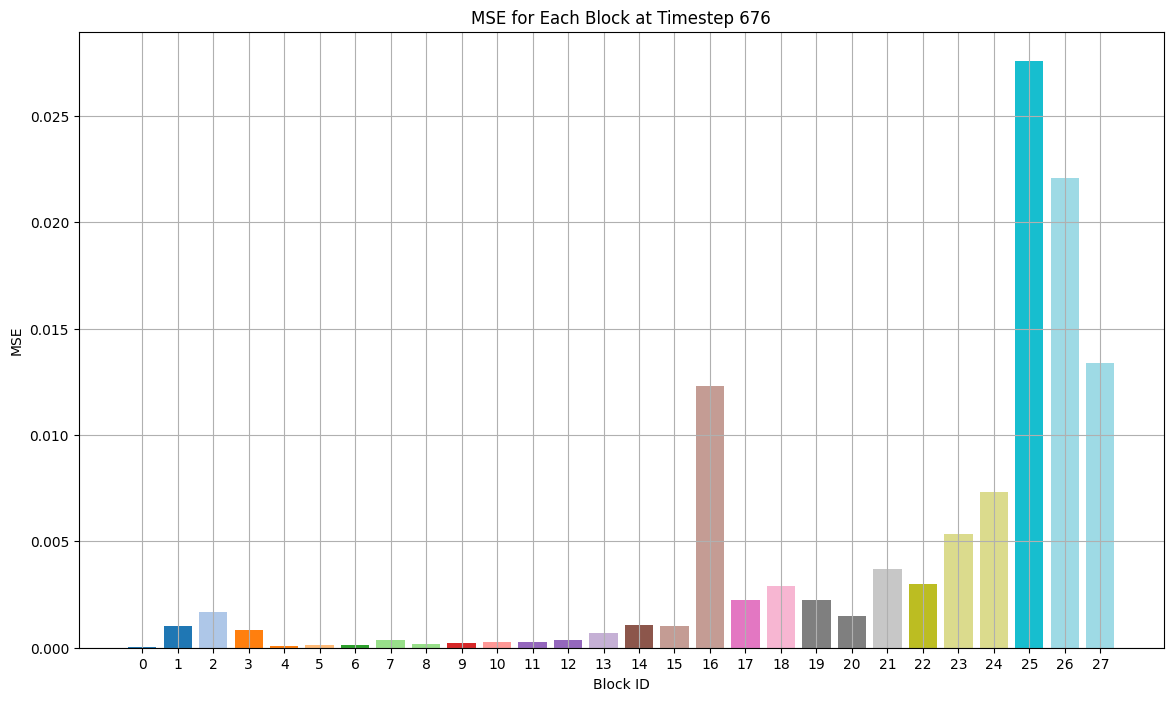

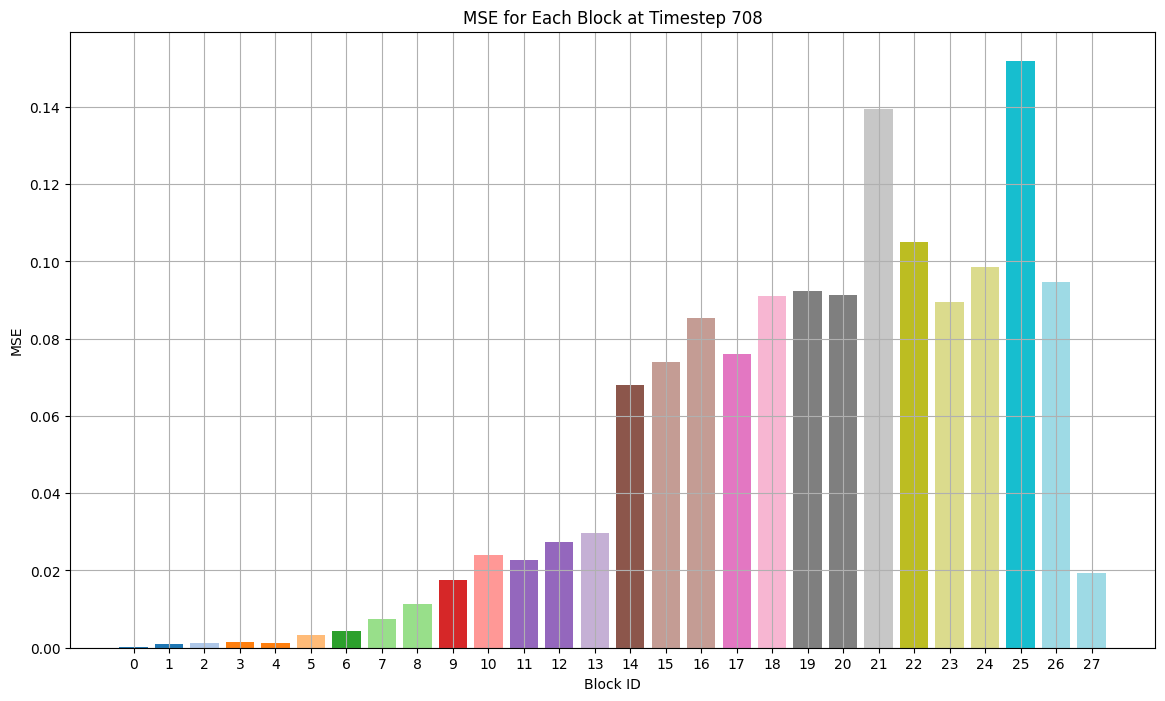

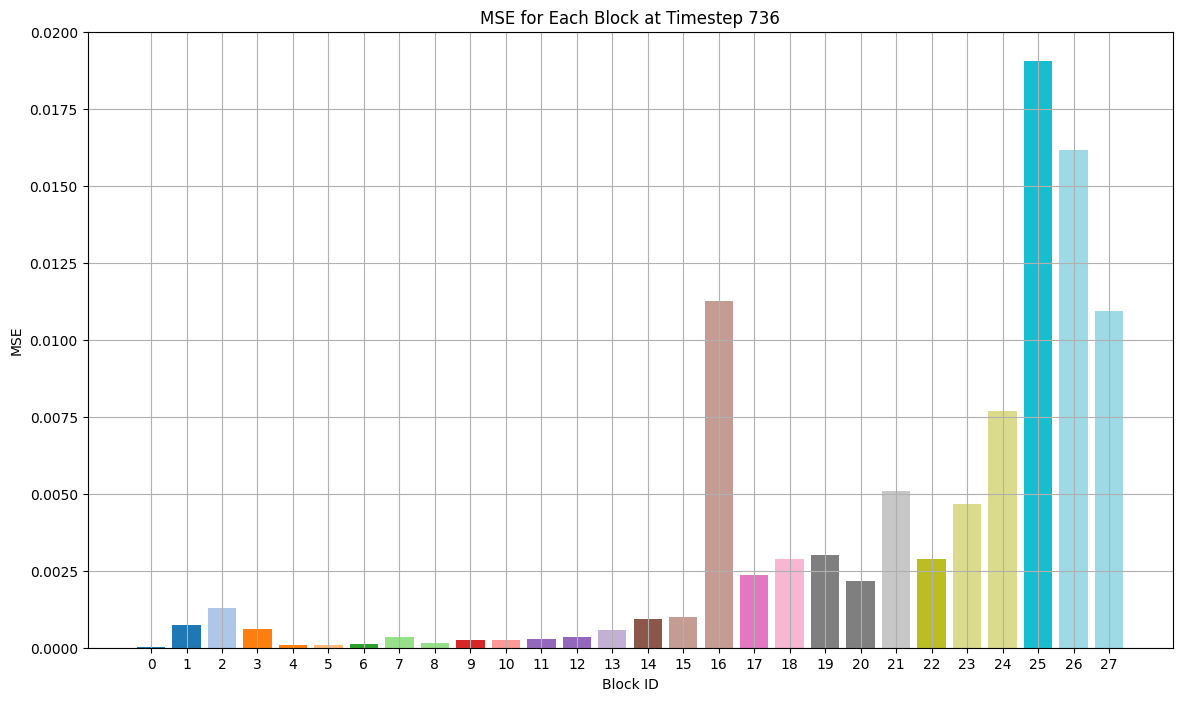

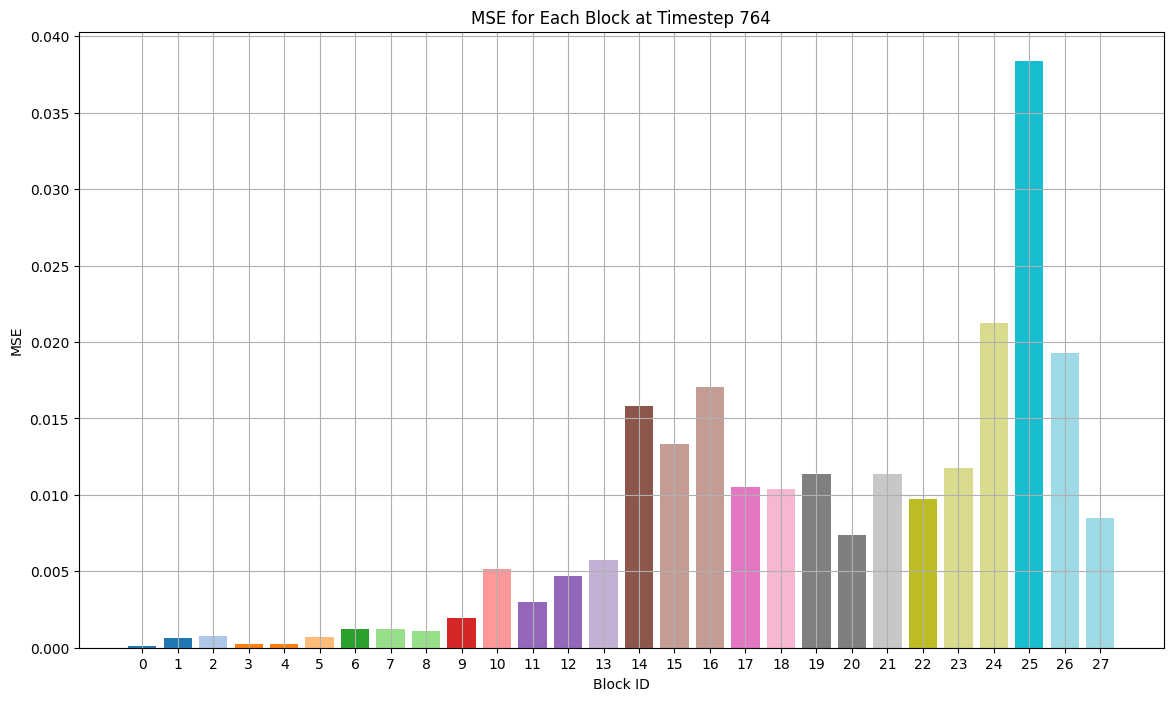

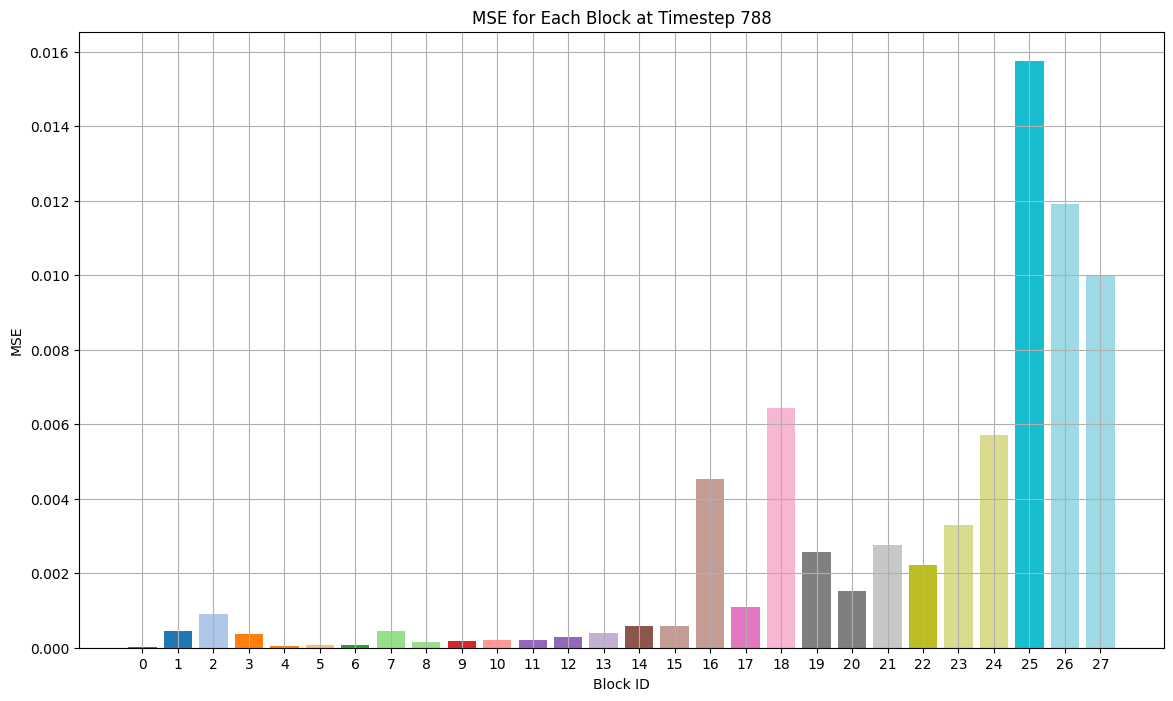

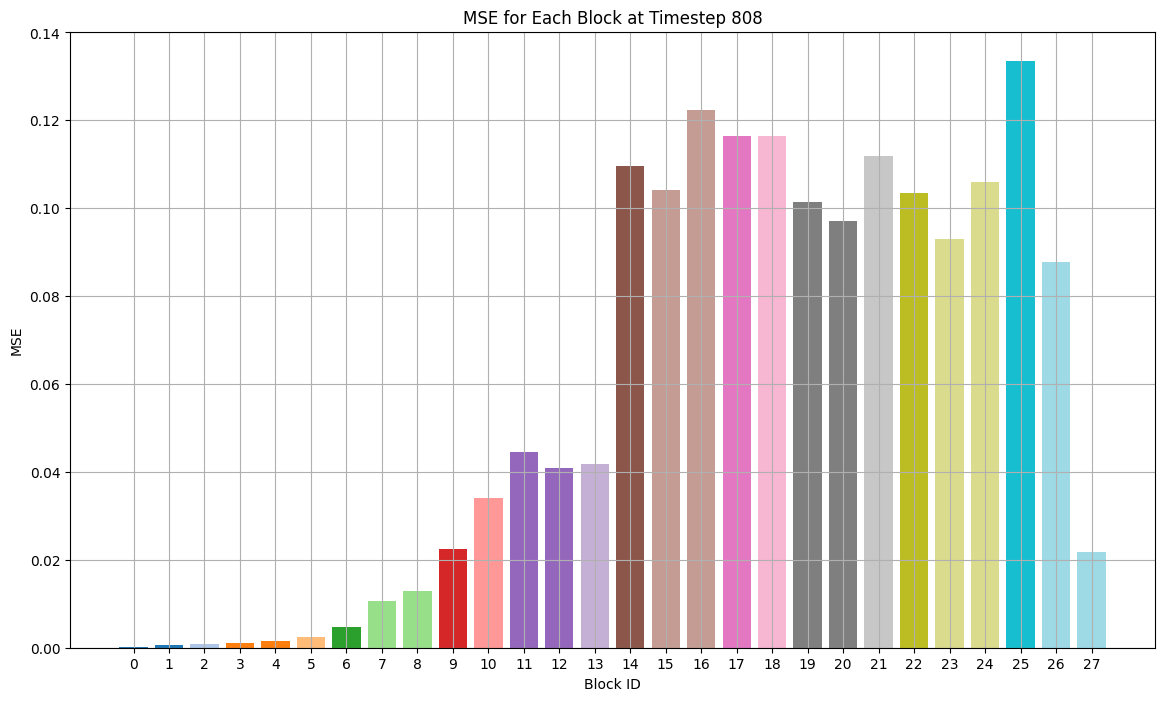

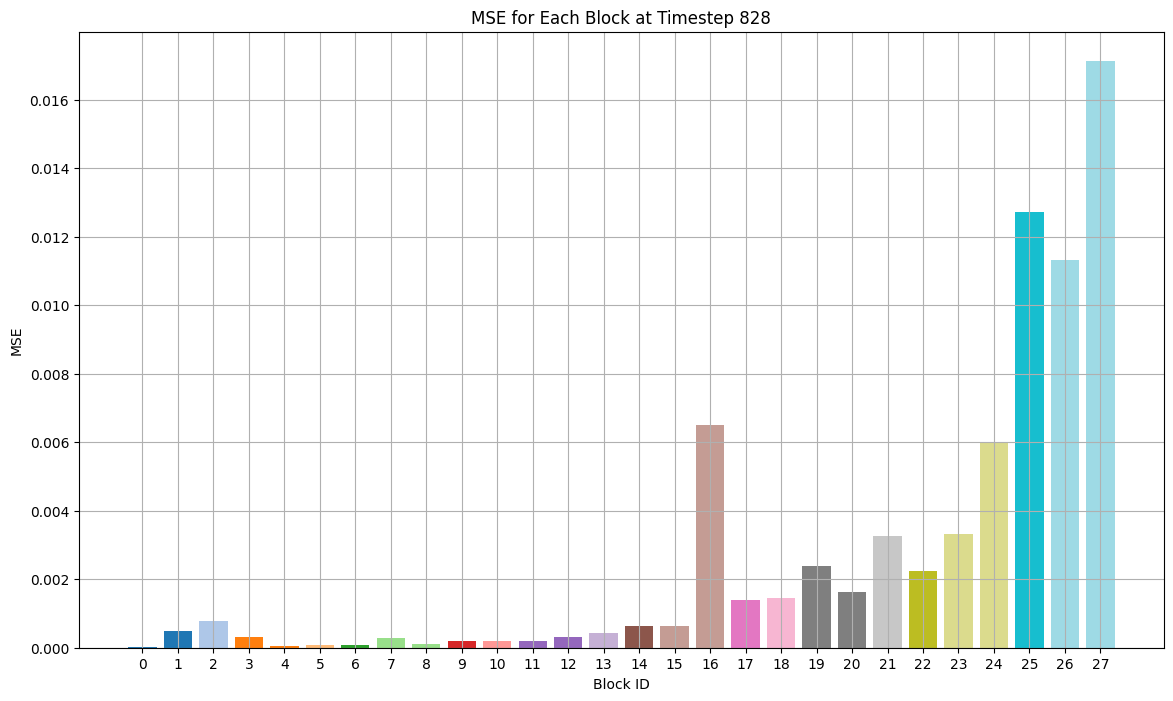

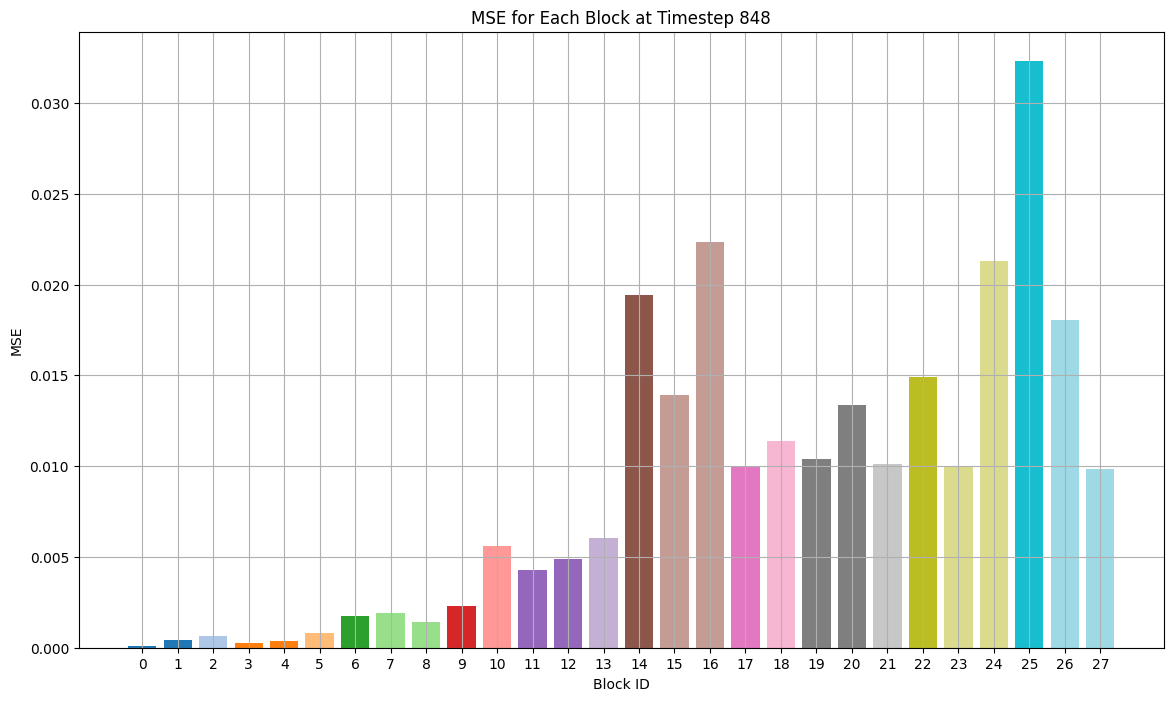

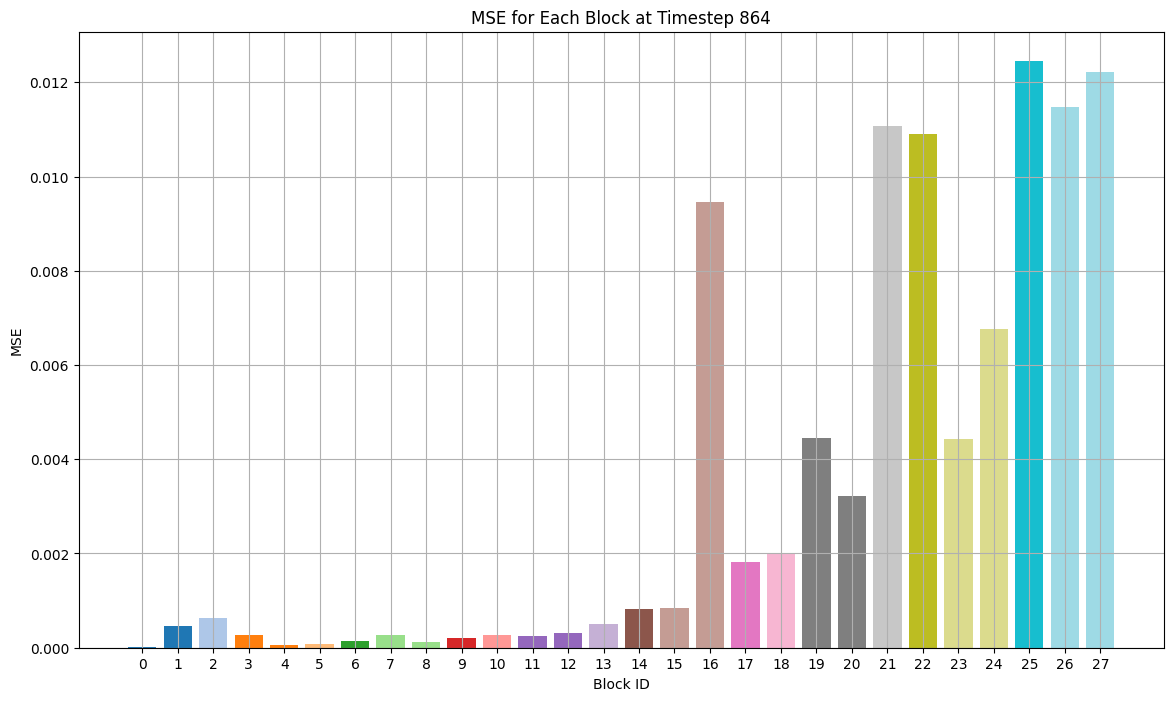

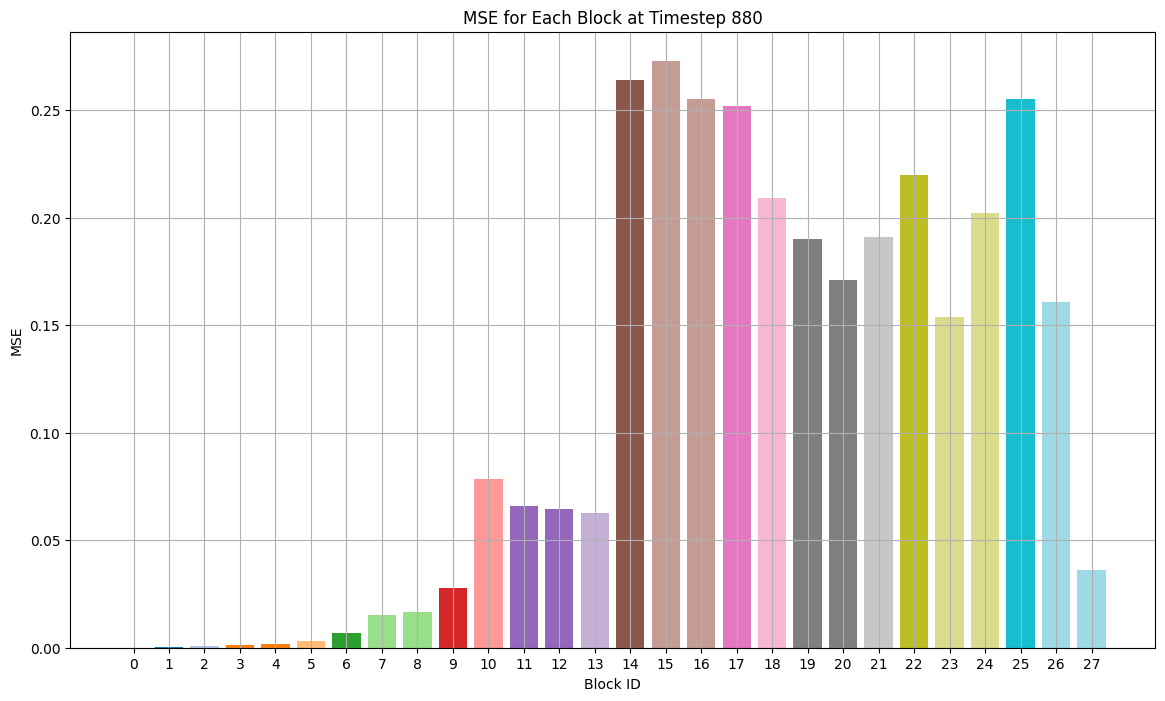

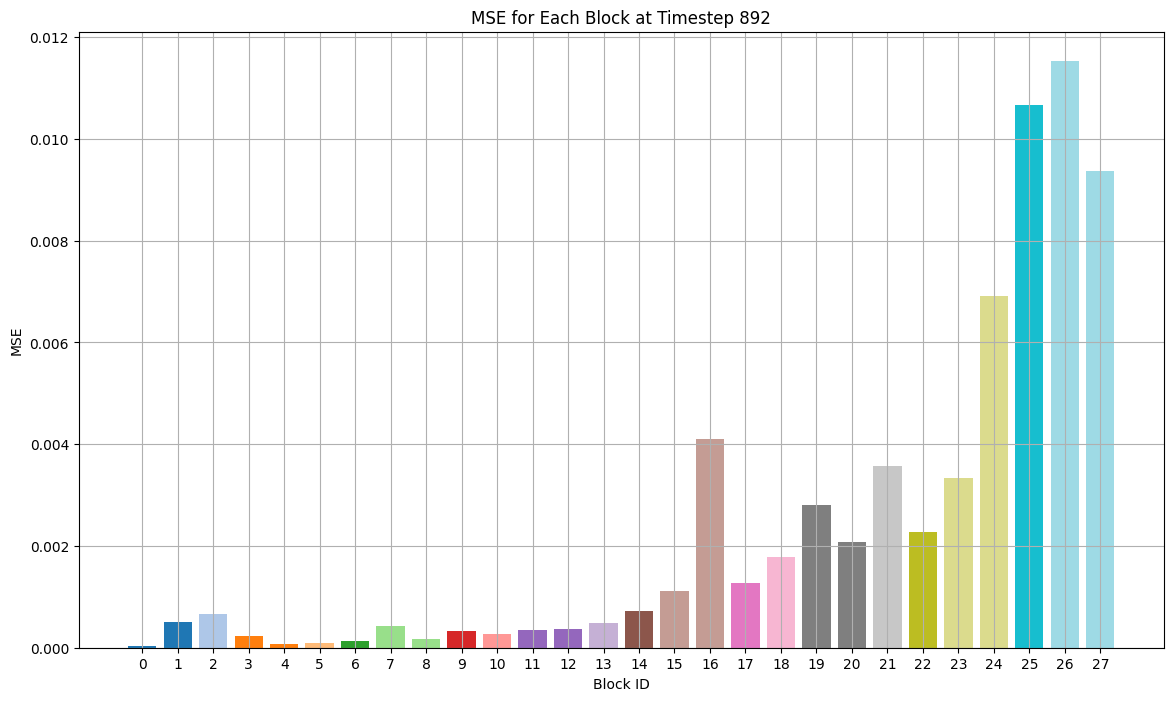

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections


# Organize data by block and timestep
block_mse = collections.defaultdict(list)
timesteps = sorted(spatial_mlp_mse.keys())

for timestep in timesteps:
    for block_id, mse in spatial_mlp_mse[timestep]:
        block_mse[block_id].append((timestep, mse))

# Define different styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
colors = plt.get_cmap('tab20', len(block_mse))

# Plot MSE for each block over time
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    if block_id < 15:
        mse_data = sorted(mse_data)
        timesteps, mses = zip(*mse_data)
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot average MSE over time
average_mse = []
for timestep in timesteps:
    mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
    average_mse.append(np.mean(mse_values))

plt.figure(figsize=(20, 8))
plt.plot(timesteps, average_mse, label='Average MSE', color='black', marker='o')
plt.xticks(timesteps)
plt.xlabel('Timestep')
plt.ylabel('Average MSE')
plt.title('Average MSE spatial Over Time')
plt.legend()
plt.grid(True)
plt.show()


all_timesteps = set()
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 900]
    if filtered_mse_data:
        timesteps, mses = zip(*filtered_mse_data)
        all_timesteps.update(timesteps)  # Collecting all unique timesteps
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time (Timesteps 400-900)')
plt.legend()
plt.grid(True)

# Set x-ticks to be the unique timesteps
plt.xticks(sorted(all_timesteps))

plt.show()
# Plot bar charts of MSE for each block at specific timesteps between 400 and 900
timesteps_set = set(t for block_data in block_mse.values() for t, mse in block_data if 400 <= t <= 900)
timesteps_sorted = sorted(timesteps_set)
for timestep in timesteps_sorted:
    mses_at_timestep = [(block_id, mse) for block_id, mse_data in block_mse.items()
                        for t, mse in mse_data if t == timestep]
    if mses_at_timestep:
        block_ids, mses = zip(*mses_at_timestep)
        x = np.arange(len(block_ids))
        plt.figure(figsize=(14, 8))
        plt.bar(x, mses, color=[colors(i) for i in range(len(block_ids))])
        plt.xlabel('Block ID')
        plt.ylabel('MSE')
        plt.title(f'MSE for Each Block at Timestep {timestep}')
        plt.xticks(x, [f'{block_id}' for block_id in block_ids])
        plt.grid(True)
        plt.show()


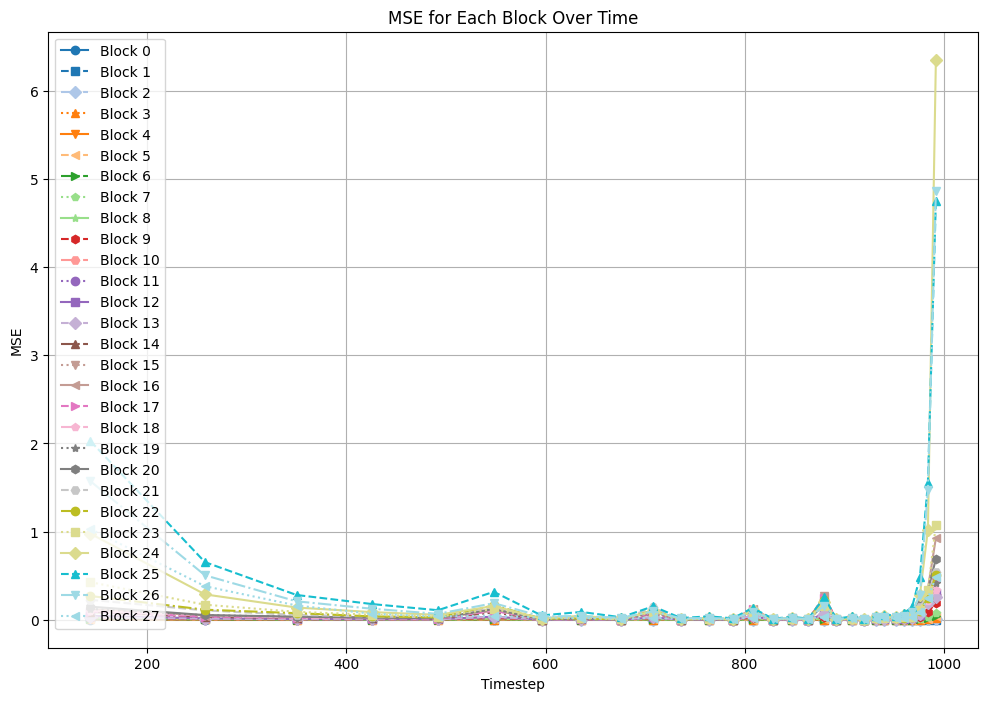

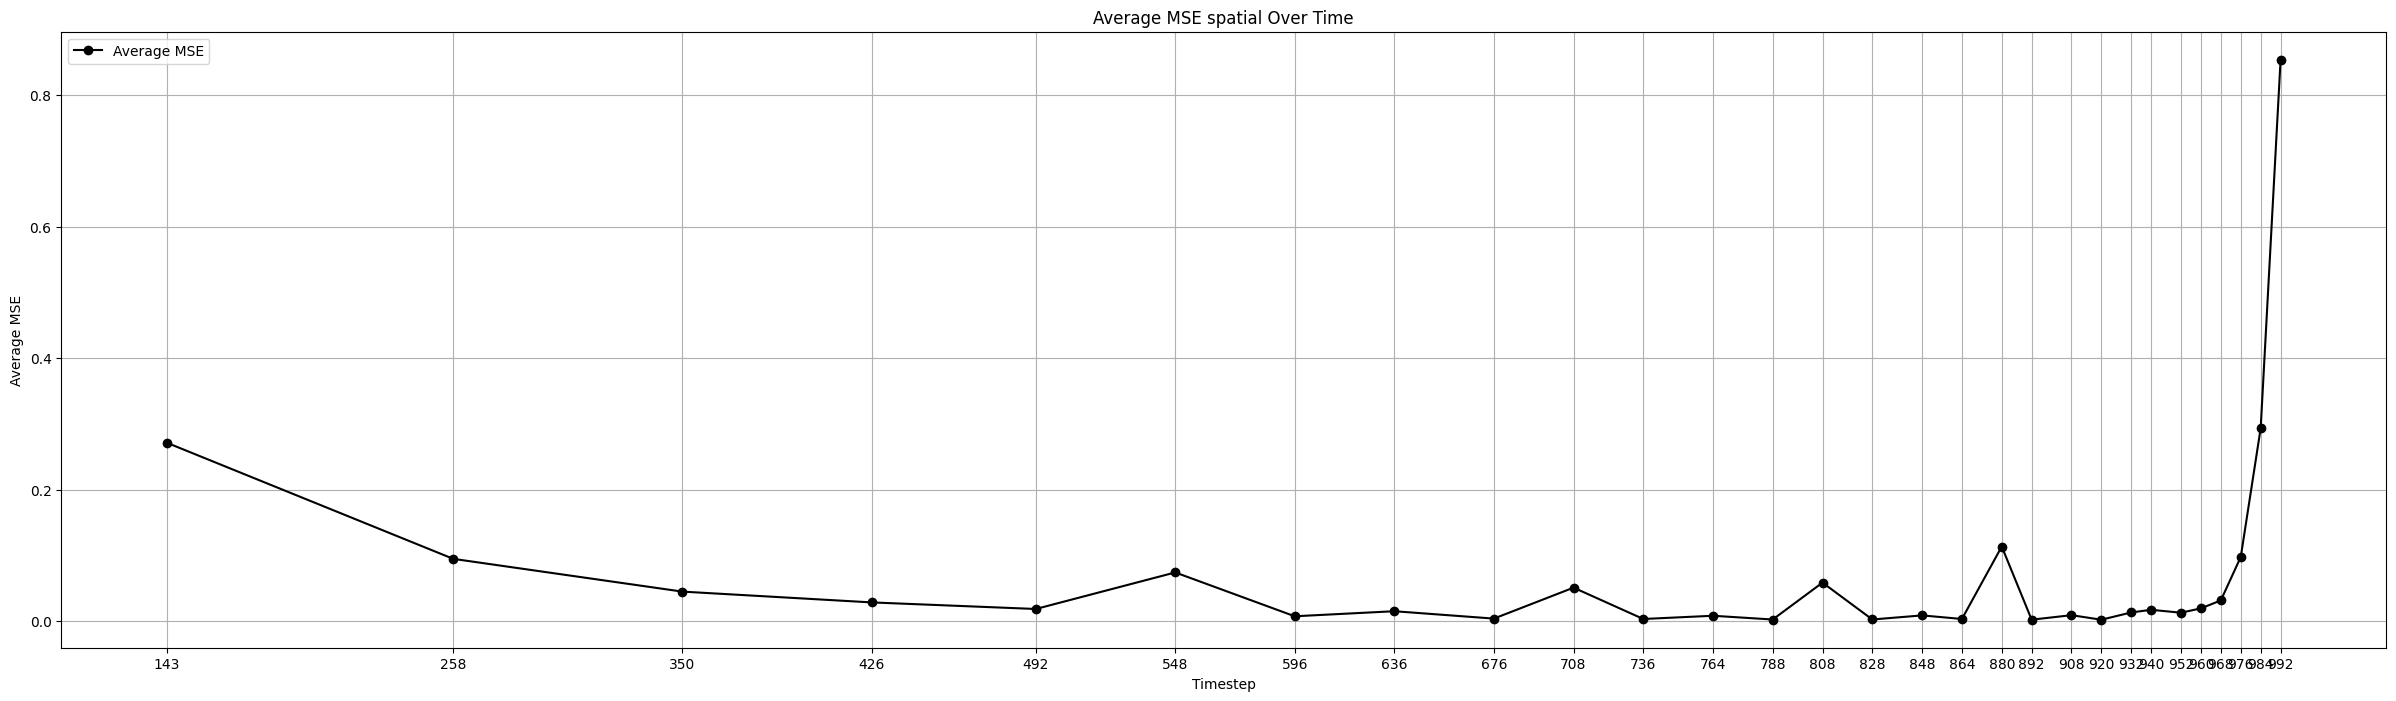

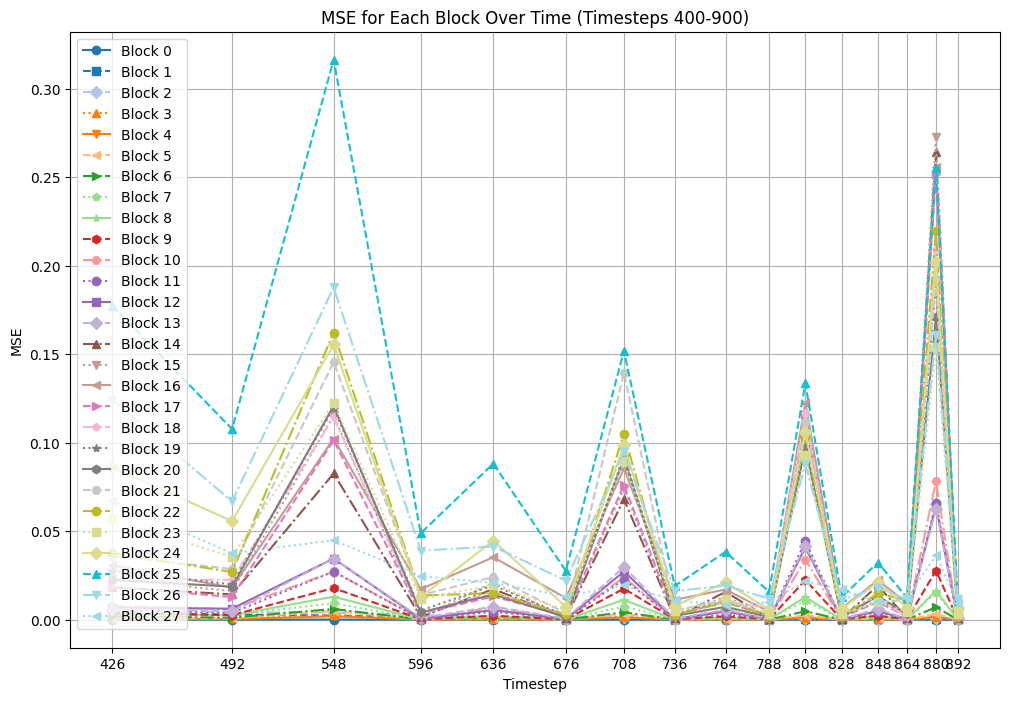

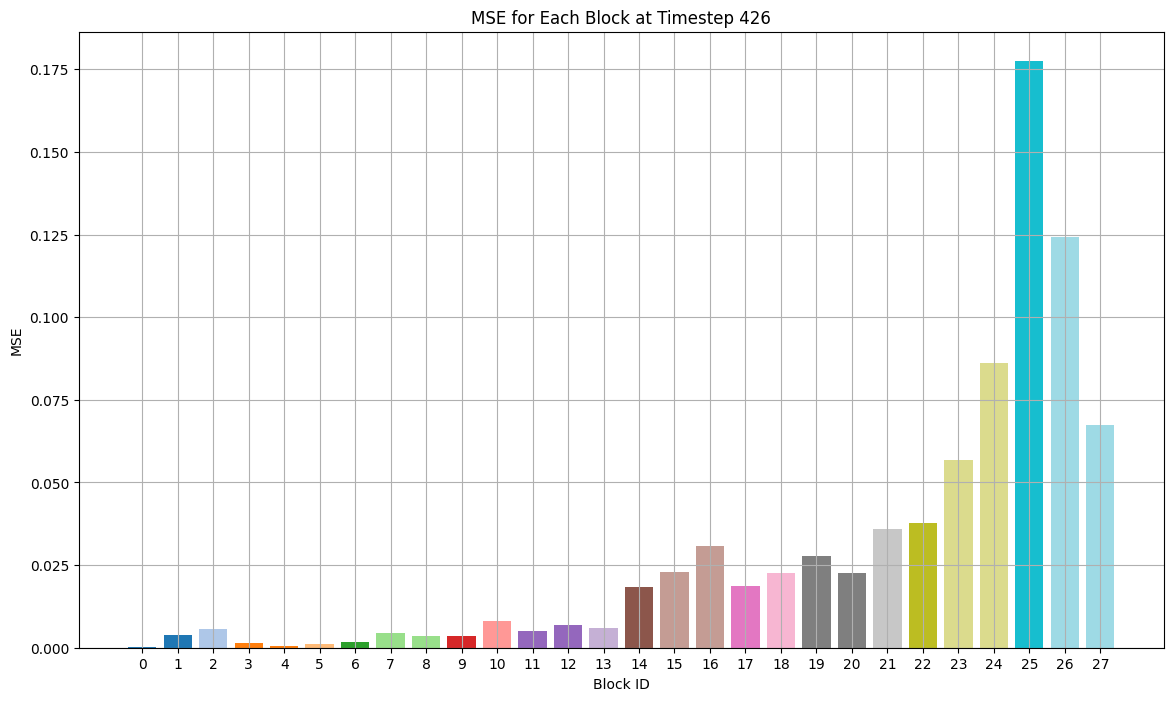

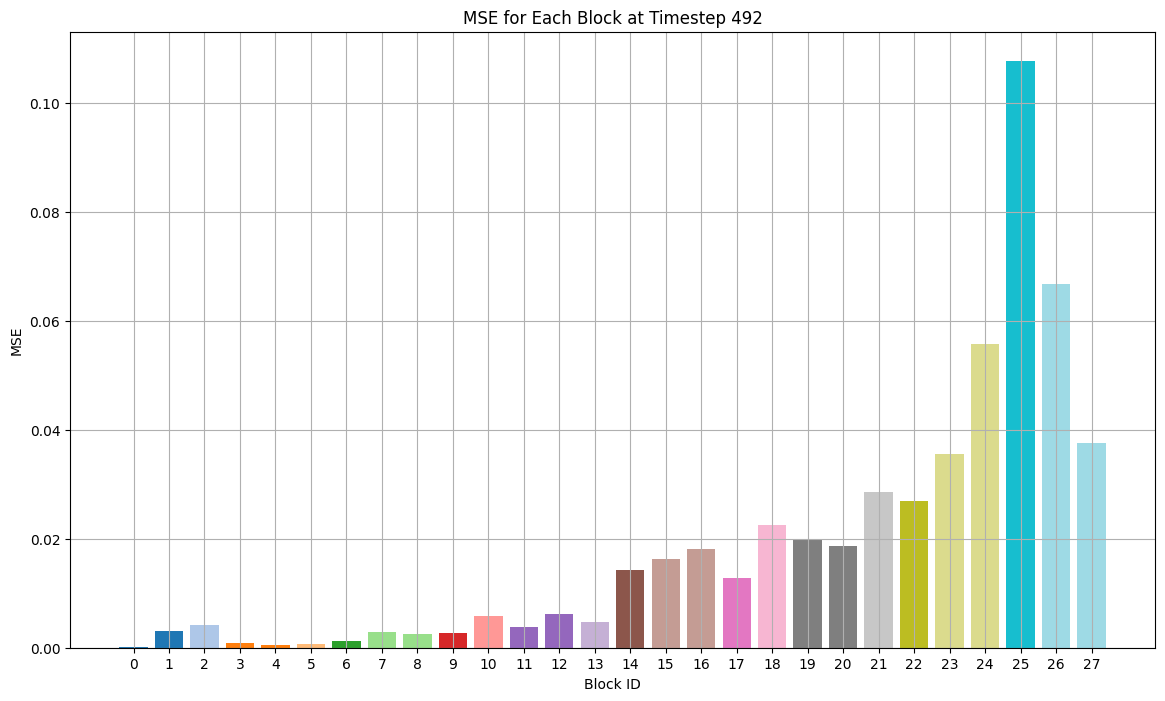

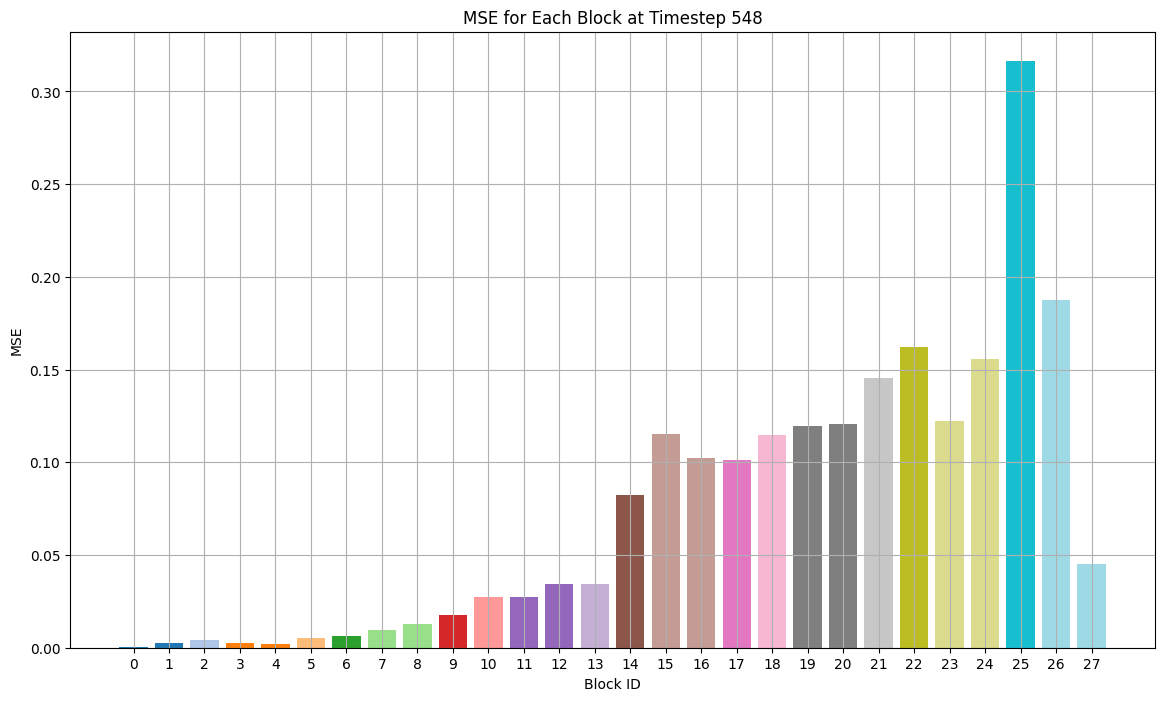

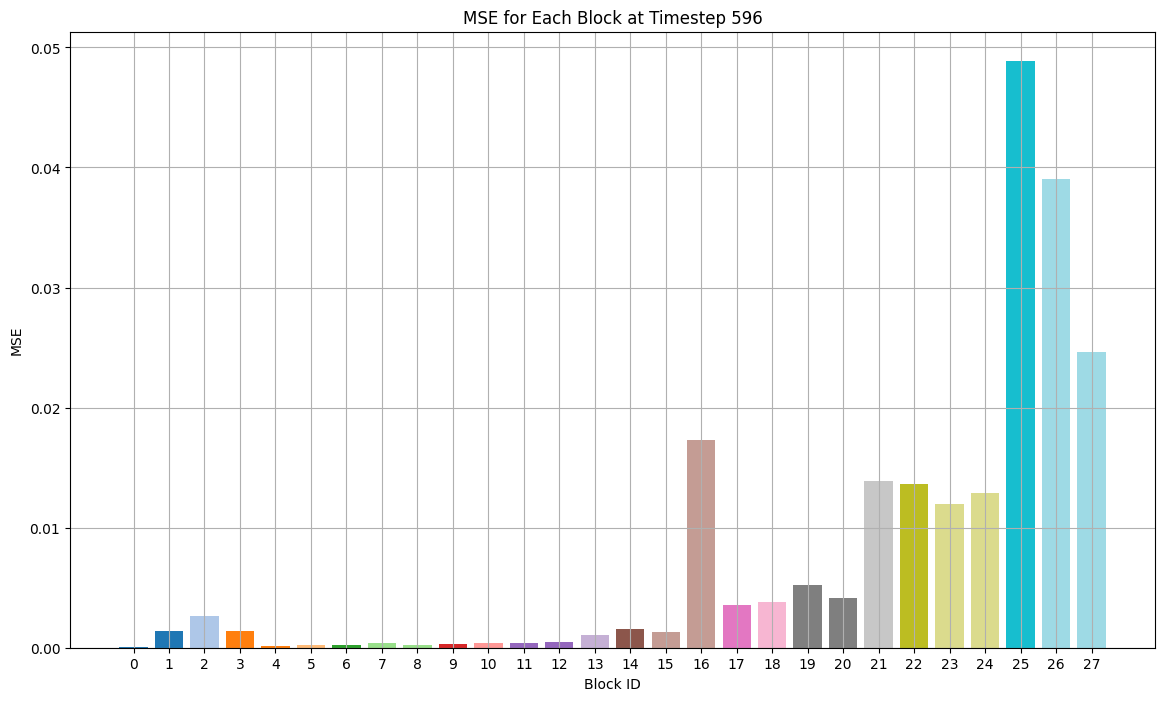

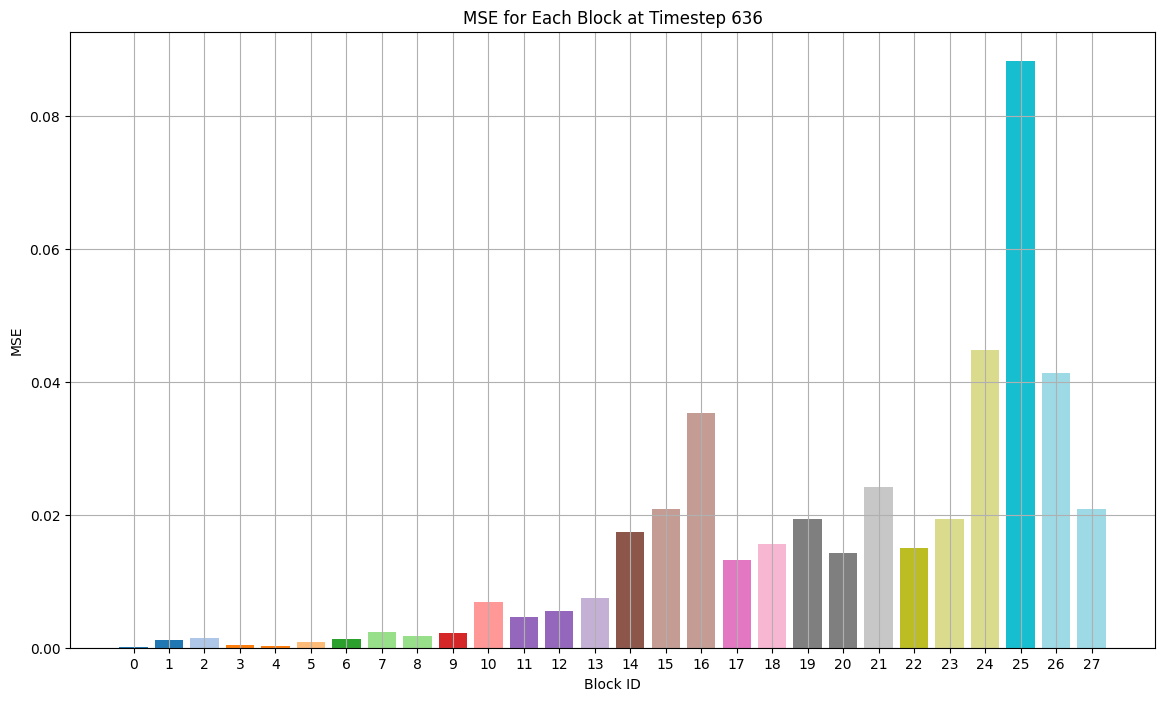

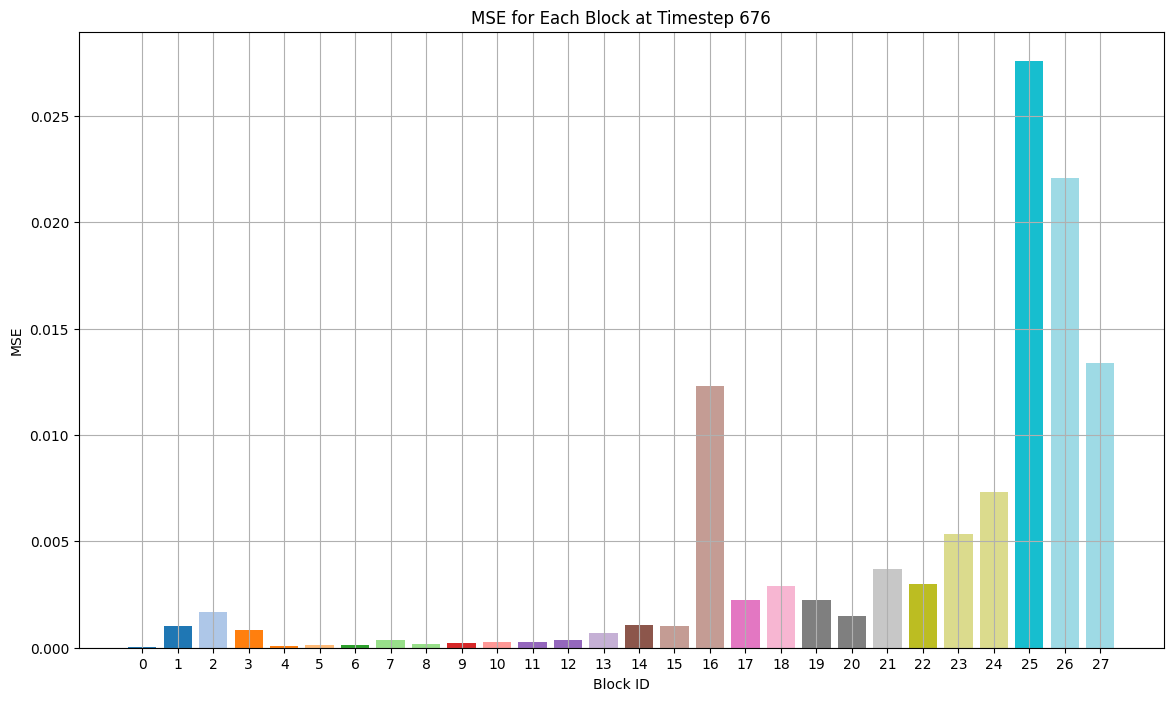

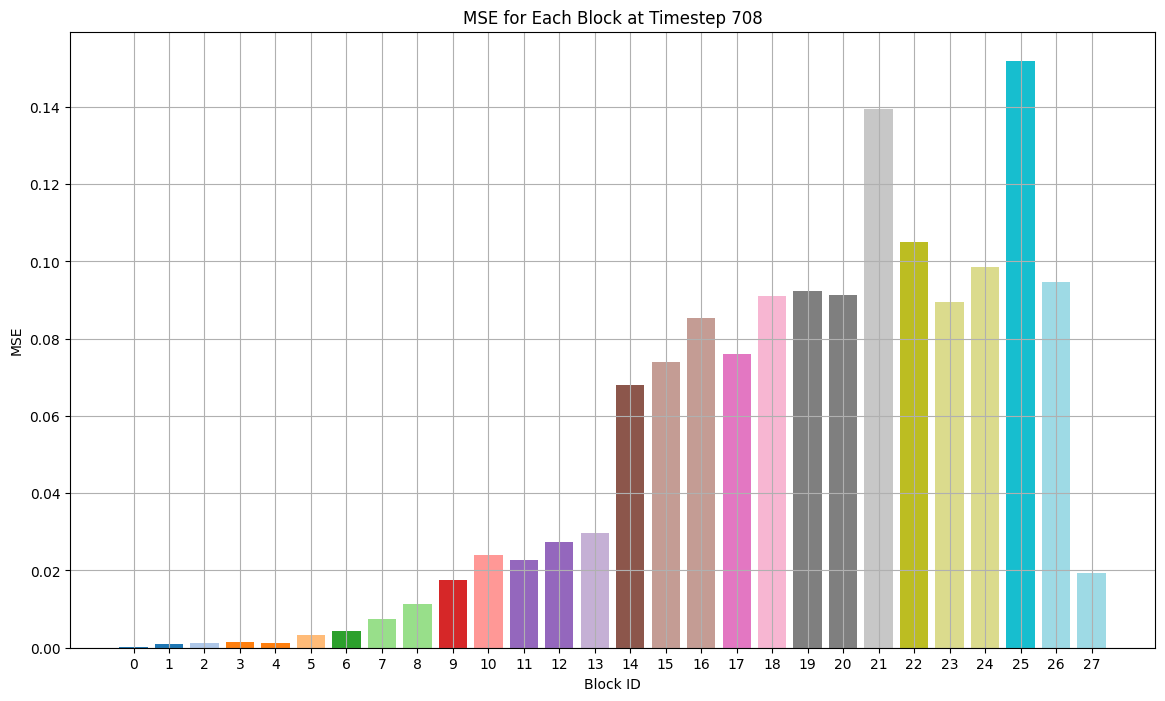

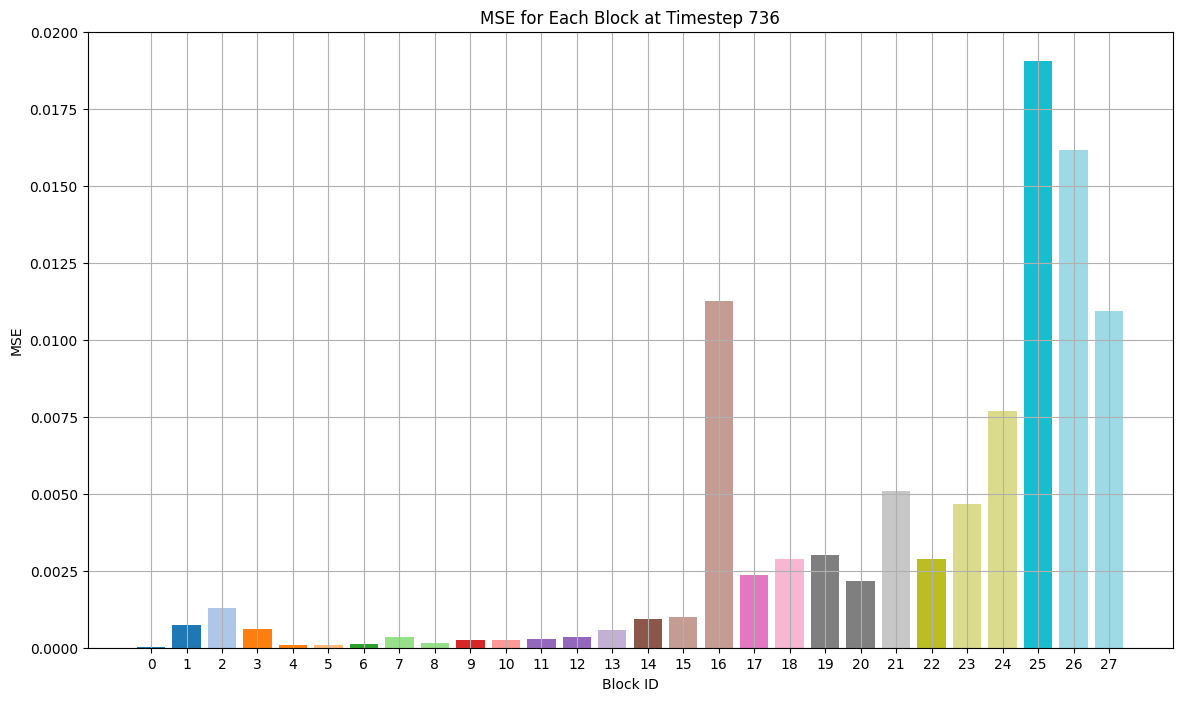

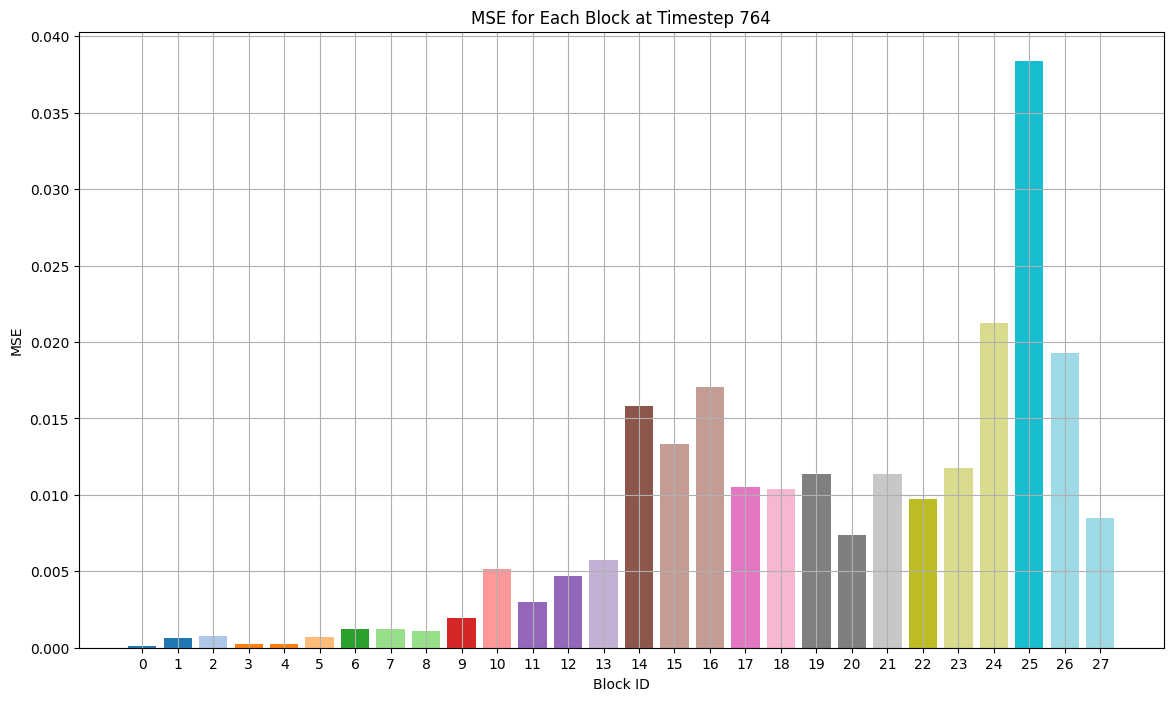

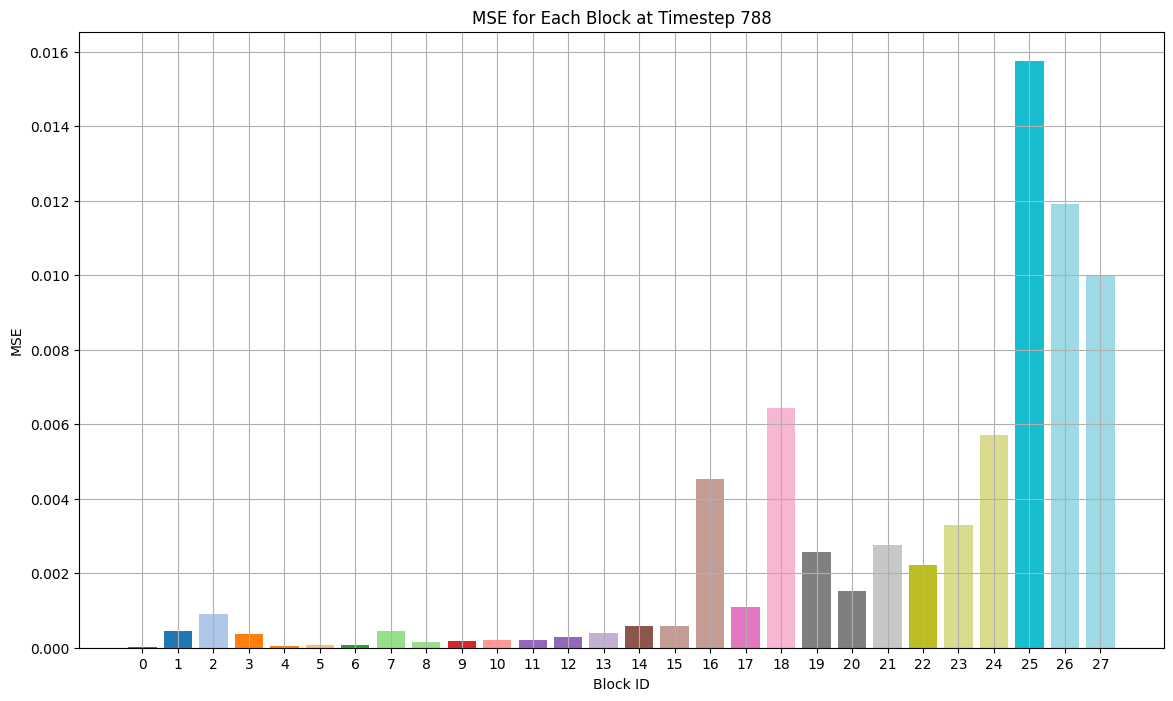

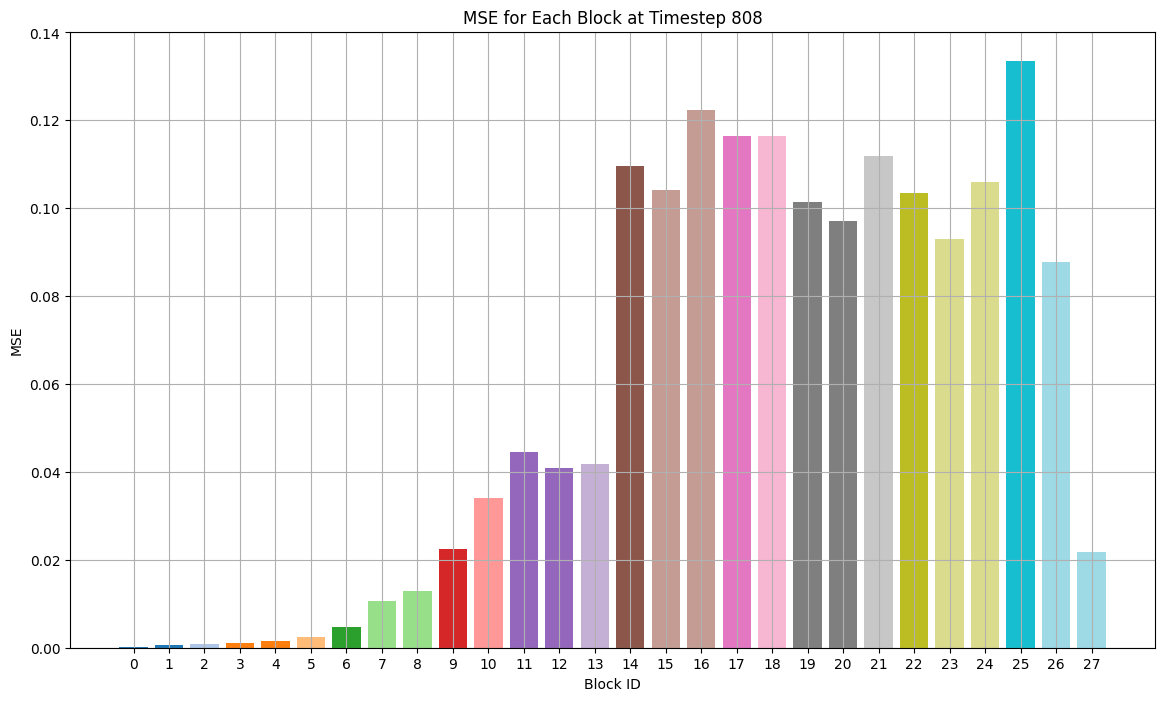

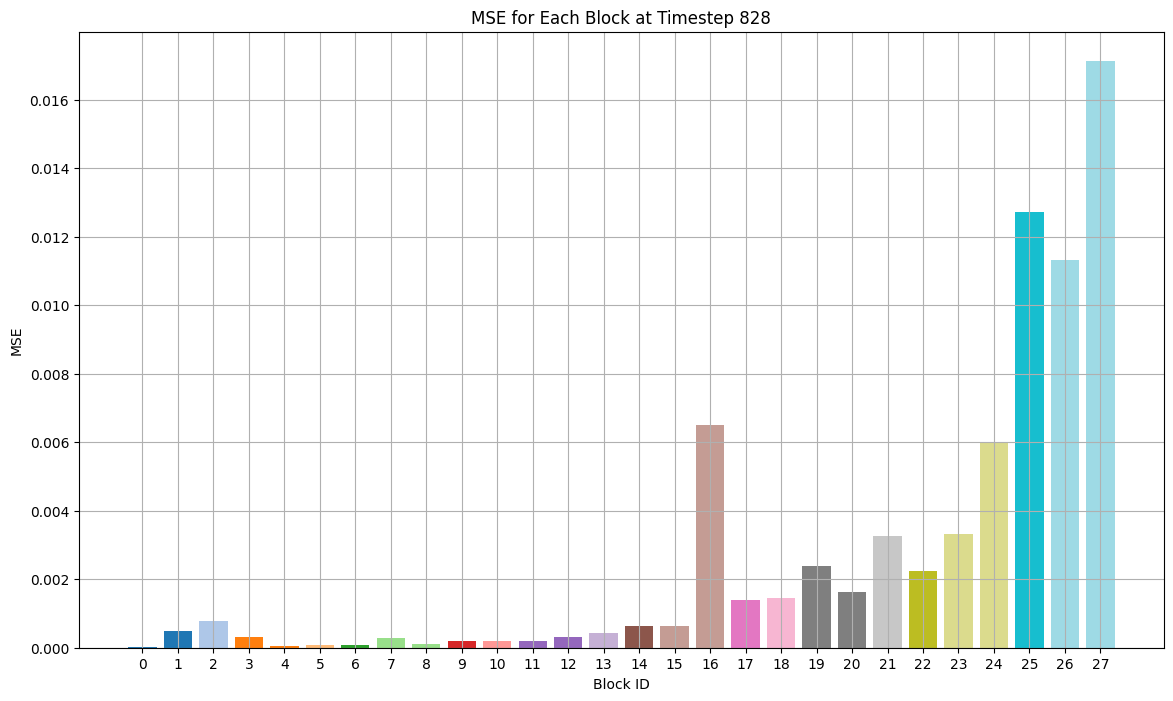

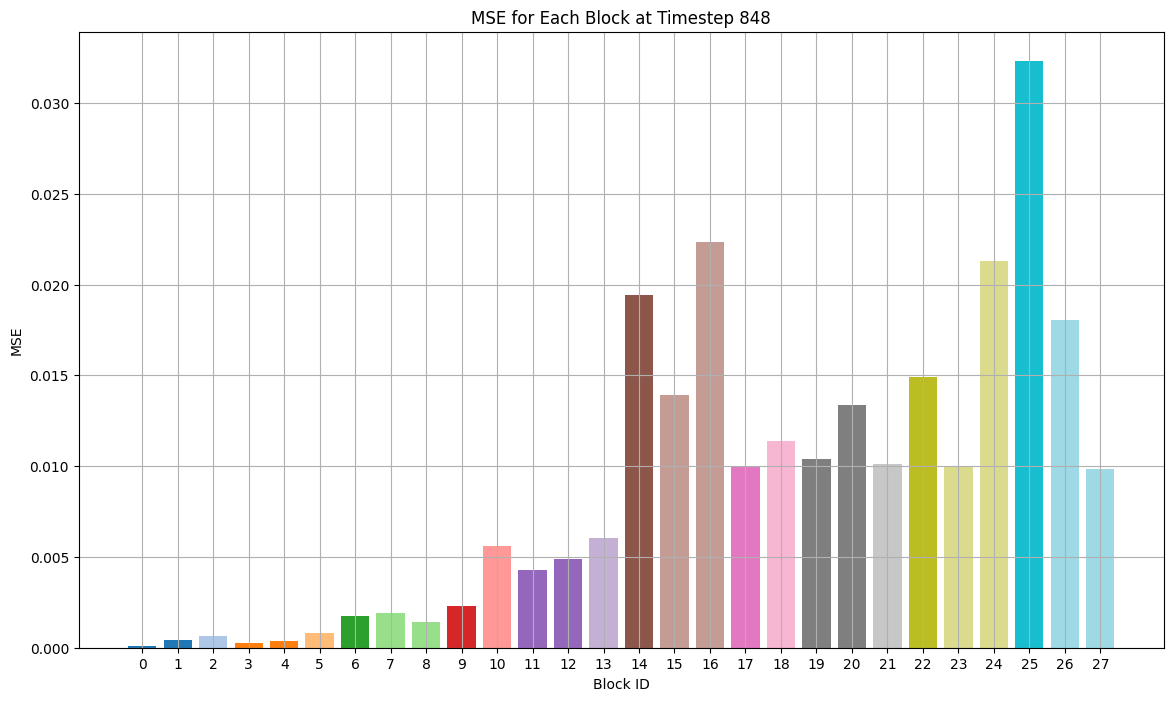

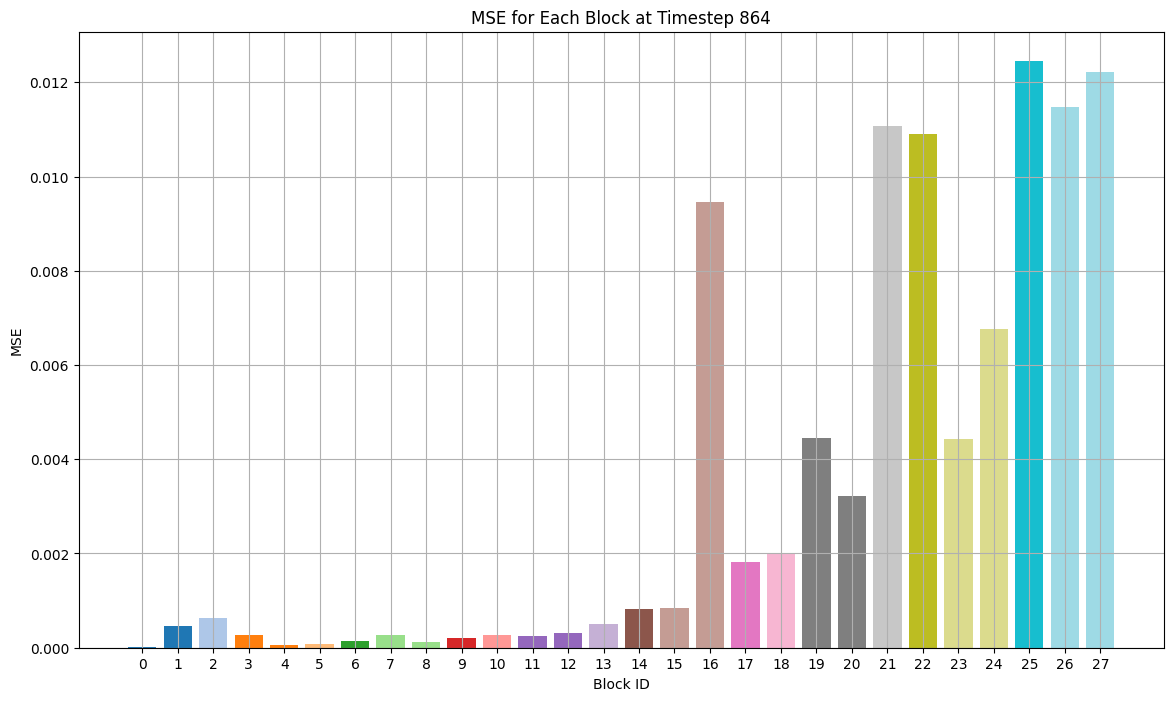

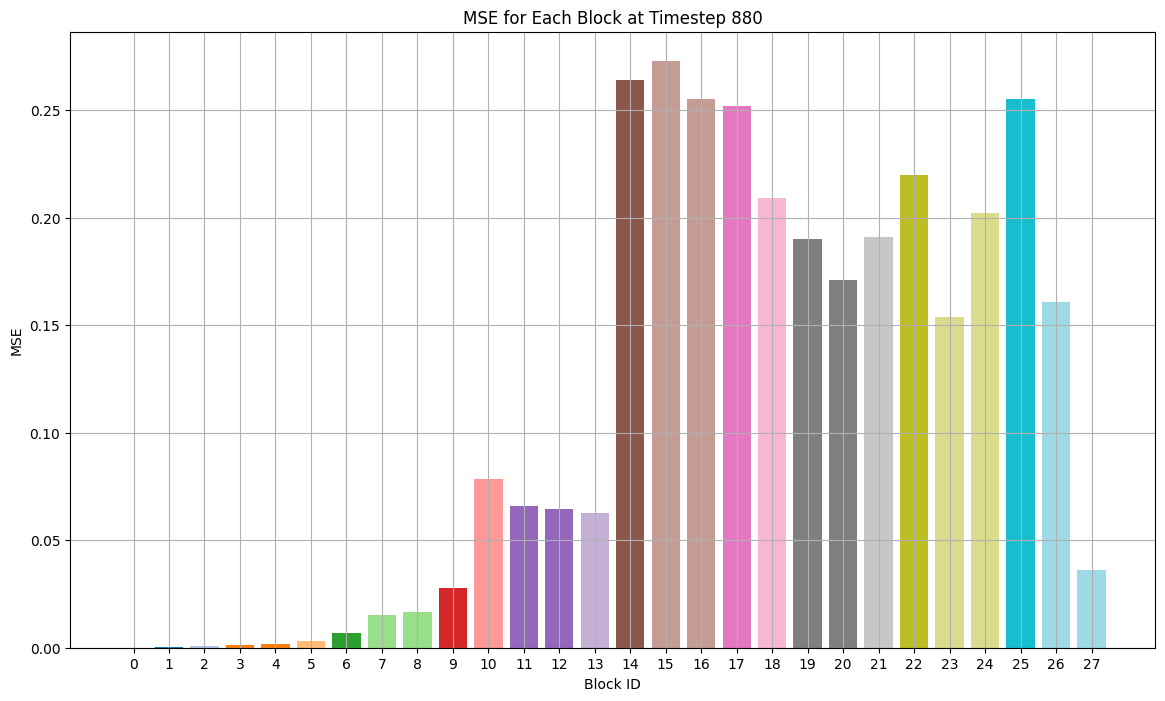

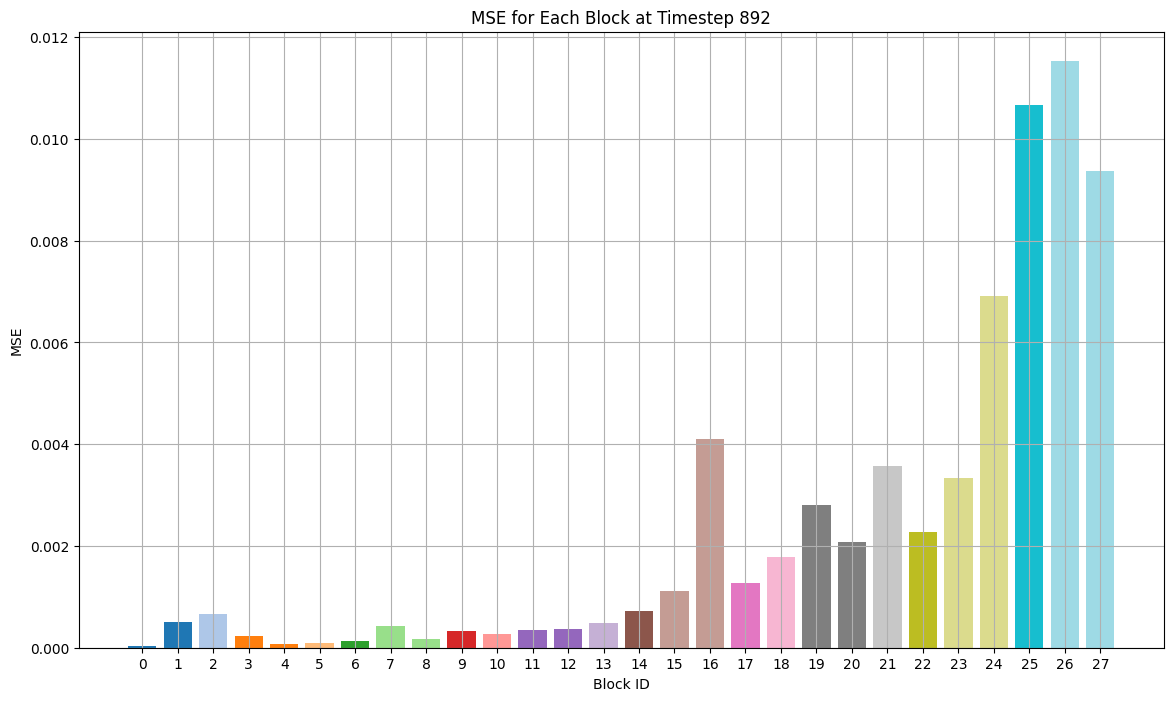

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections


# Organize data by block and timestep
block_mse = collections.defaultdict(list)
timesteps = sorted(spatial_mlp_mse.keys())

for timestep in timesteps:
    for block_id, mse in spatial_mlp_mse[timestep]:
        block_mse[block_id].append((timestep, mse))

# Define different styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
colors = plt.get_cmap('tab20', len(block_mse))

# Plot MSE for each block over time
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    timesteps, mses = zip(*mse_data)
    plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot average MSE over time
average_mse = []
for timestep in timesteps:
    mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
    average_mse.append(np.mean(mse_values))

plt.figure(figsize=(30, 8))
plt.plot(timesteps, average_mse, label='Average MSE', color='black', marker='o')
plt.xticks(timesteps)
plt.xlabel('Timestep')
plt.ylabel('Average MSE')
plt.title('Average MSE spatial Over Time')
plt.legend()
plt.grid(True)
plt.show()


all_timesteps = set()
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 900]
    if filtered_mse_data:
        timesteps, mses = zip(*filtered_mse_data)
        all_timesteps.update(timesteps)  # Collecting all unique timesteps
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time (Timesteps 400-900)')
plt.legend()
plt.grid(True)

# Set x-ticks to be the unique timesteps
plt.xticks(sorted(all_timesteps))

plt.show()
# Plot bar charts of MSE for each block at specific timesteps between 400 and 900
timesteps_set = set(t for block_data in block_mse.values() for t, mse in block_data if 400 <= t <= 900)
timesteps_sorted = sorted(timesteps_set)
for timestep in timesteps_sorted:
    mses_at_timestep = [(block_id, mse) for block_id, mse_data in block_mse.items()
                        for t, mse in mse_data if t == timestep]
    if mses_at_timestep:
        block_ids, mses = zip(*mses_at_timestep)
        x = np.arange(len(block_ids))
        plt.figure(figsize=(14, 8))
        plt.bar(x, mses, color=[colors(i) for i in range(len(block_ids))])
        plt.xlabel('Block ID')
        plt.ylabel('MSE')
        plt.title(f'MSE for Each Block at Timestep {timestep}')
        plt.xticks(x, [f'{block_id}' for block_id in block_ids])
        plt.grid(True)
        plt.show()


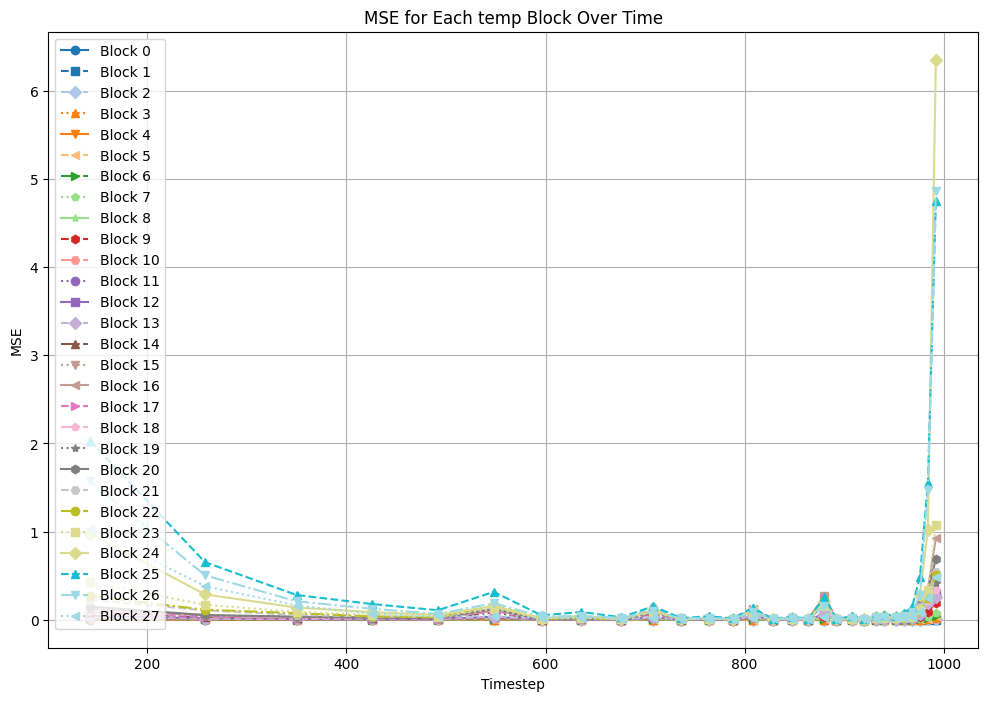

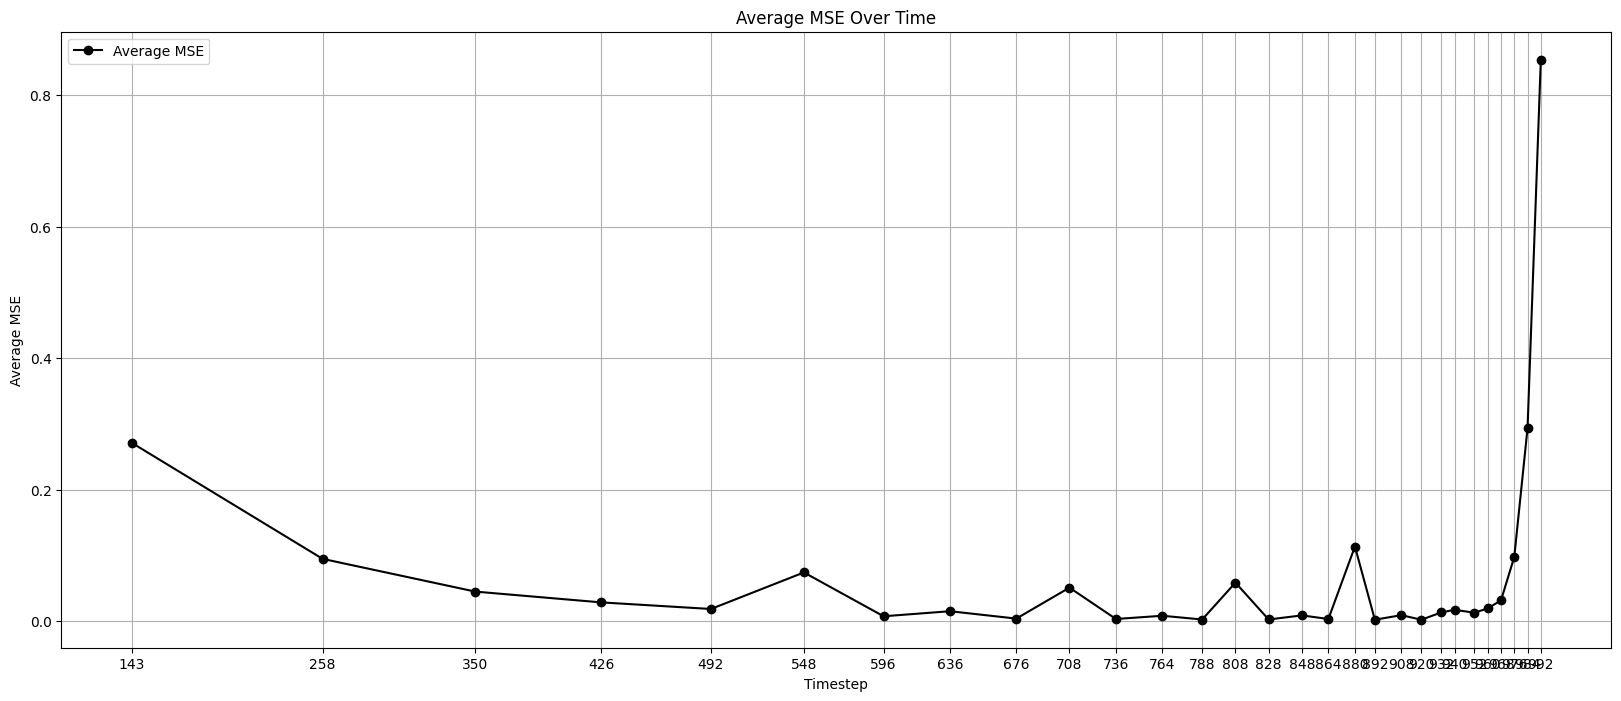

[143, 258, 350, 426, 492, 548, 596, 636, 676, 708, 736, 764, 788, 808, 828, 848, 864, 880, 892, 908, 920, 932, 940, 952, 960, 968, 976, 984, 992]


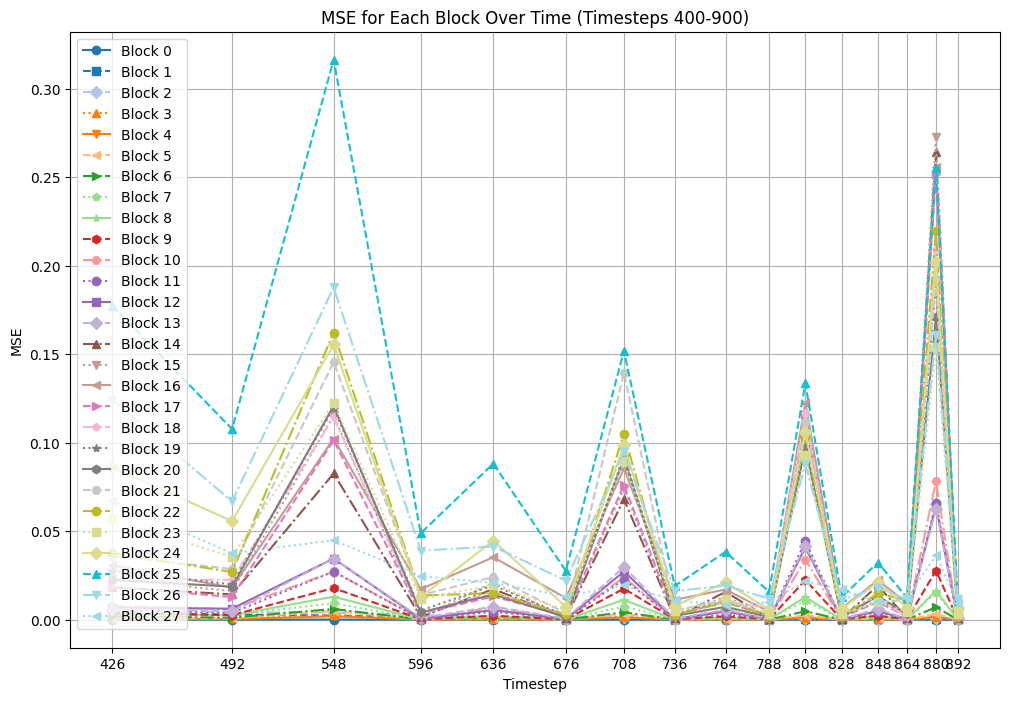

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import collections

# Load the data

# Organize data by block and timestep
block_mse = collections.defaultdict(list)
timesteps = sorted(spatial_mlp_mse.keys())

for timestep in timesteps:
    for block_id, mse in spatial_mlp_mse[timestep]:
        block_mse[block_id].append((timestep, mse))

# Define different styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']
colors = plt.get_cmap('tab20', len(block_mse))

# Plot MSE for each block over time
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    timesteps, mses = zip(*mse_data)
    plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each temp Block Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot average MSE over time
average_mse = []
for timestep in timesteps:
    mse_values = [mse for _, mse in spatial_mlp_mse[timestep]]
    average_mse.append(np.mean(mse_values))

plt.figure(figsize=(20, 8))
plt.plot(timesteps, average_mse, label='Average MSE', color='black', marker='o')
plt.xticks(timesteps)
plt.xlabel('Timestep')
plt.ylabel('Average MSE')
plt.title('Average MSE Over Time')
plt.legend()
plt.grid(True)
plt.show()

ts = sorted(list(timesteps))
print(ts)


all_timesteps = set()
plt.figure(figsize=(12, 8))
for idx, (block_id, mse_data) in enumerate(block_mse.items()):
    mse_data = sorted(mse_data)
    filtered_mse_data = [(t, mse) for t, mse in mse_data if 400 <= t <= 900]
    if filtered_mse_data:
        timesteps, mses = zip(*filtered_mse_data)
        all_timesteps.update(timesteps)  # Collecting all unique timesteps
        plt.plot(timesteps, mses, label=f'Block {block_id}', linestyle=line_styles[idx % len(line_styles)],
                marker=markers[idx % len(markers)], color=colors(idx))

plt.xlabel('Timestep')
plt.ylabel('MSE')
plt.title('MSE for Each Block Over Time (Timesteps 400-900)')
plt.legend()
plt.grid(True)

# Set x-ticks to be the unique timesteps
plt.xticks(sorted(all_timesteps))

plt.show()

